In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
import settings
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def chromosome_bin_lenght(segregation_table, chrom):
    return np.ceil(segregation_table[chrom]['stop_position'][-1]/resolution).astype(int)

def select_chromosomes_coordinates(chrA, chrB, chr_windows_sizes):
    if(chrA==0 or chrB ==0):
        print("0 is not accepted as chromosome index ")
        return

    chrA_idx, chrB_idx = chrA - 1, chrB - 1

    if(chrA_idx>chrB_idx):
        chrA_idx, chrB_idx = chrB_idx, chrA_idx

    start_row    = np.sum(chr_windows_sizes[:chrA_idx])
    stop_row     = start_row + chr_windows_sizes[chrA_idx]
    start_column = np.sum(chr_windows_sizes[:chrB_idx])
    stop_column  = start_column + chr_windows_sizes[chrB_idx]

    return start_row, stop_row, start_column, stop_column

which_beta = "$\\beta$ evaluated | 1/2"

# segregation table import #

In [3]:
name_root_1NP_1Mb = "mesc_46C_1Mb_481x1"

if(name_root_1NP_1Mb!= settings.name_root):
    raise ValueError("Change name_root in settings.py and then restart the notebook")

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f:
    segregation_table_1NP_1Mb = pickle.load(f)

start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP_1Mb[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)


# Statistics of $\pi$ in chr12 and 18 #

nan percentage in cosegregation

la percentuale dei nan nelle pi è esattamente corrispondente alla percentuale di nan nelle coseg, l'unica cosa a cui porre attenzione è che questa percentuale viene calcolata sulle squareform i.e. escludendo totalmente la diagonale

## Cosegregations of chr12 and chr18 ##

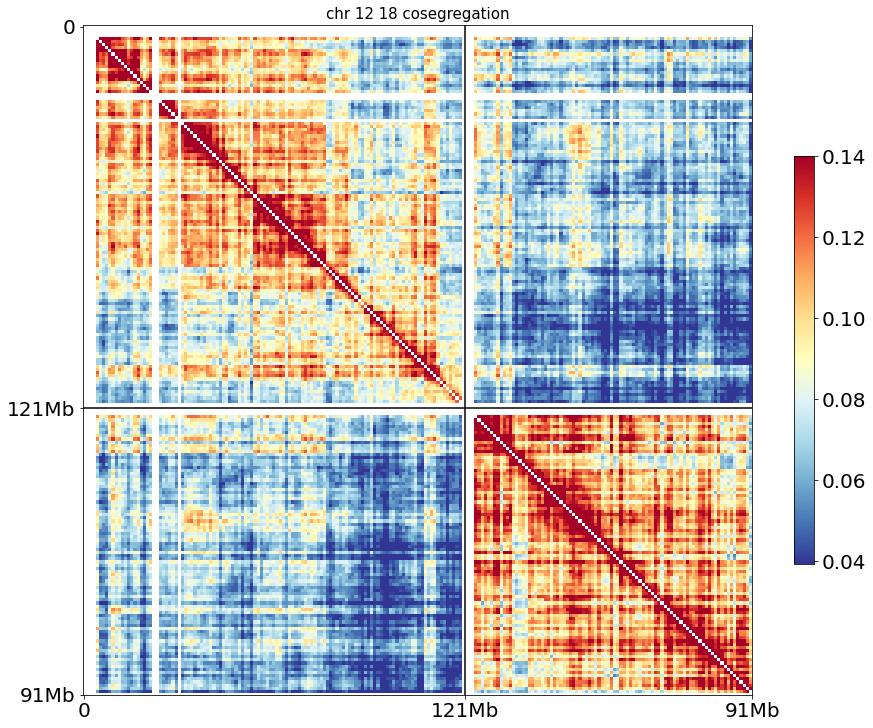

In [4]:
chr12_1NP_1Mb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_1Mb['chr12']['segregation_table'])
chr18_1NP_1Mb_coseg = compute_tube_cosegregation_matrix(segregation_table_1NP_1Mb['chr18']['segregation_table'])
chr12_18_1NP_1Mb_coseg = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_1Mb['chr12']['segregation_table'], segregation_table_1NP_1Mb['chr18']['segregation_table'])

plot_heatmap_two_chromosomes(chr12_1NP_1Mb_coseg, chr18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_coseg, colormap = "RdYlBu_r", title = "chr 12 18 cosegregation");


/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:40: RuntimeWarning: divide by zero encountered in log
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)
/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/src/utilities.py:56: RuntimeWarning: divide by zero encountered in log
  npmi_mat = - np.log(F_ij / (F_i * F_j)) / np.log(F_ij)


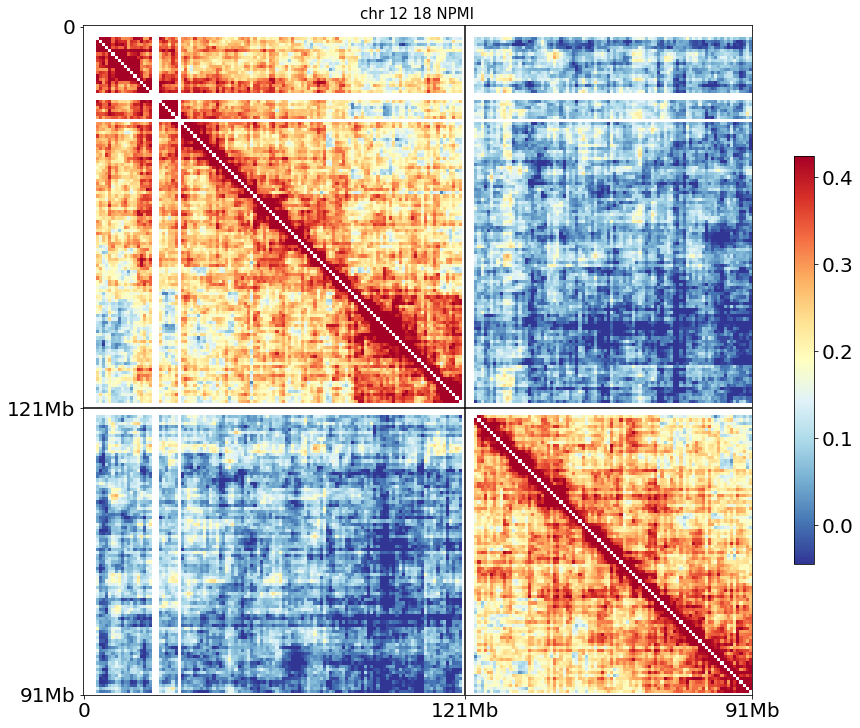

In [5]:
chr12_1NP_1Mb_npmi = compute_npmi(segregation_table_1NP_1Mb['chr12']['segregation_table'])
chr18_1NP_1Mb_npmi = compute_npmi(segregation_table_1NP_1Mb['chr18']['segregation_table'])
chr12_18_1NP_1Mb_npmi = compute_npmi_inter(segregation_table_1NP_1Mb['chr12']['segregation_table'], segregation_table_1NP_1Mb['chr18']['segregation_table'])


plot_heatmap_two_chromosomes(chr12_1NP_1Mb_npmi, chr18_1NP_1Mb_npmi, chr12_18_1NP_1Mb_npmi, colormap = "RdYlBu_r", title = "chr 12 18 NPMI");

## intra 1NP ##

In [6]:
from src.slice_pairwise import single_chromosome

### chromosome 12 ###

In [7]:
s = 213515
rg = Generator(MT19937(s))
print("chromosome 12 1NP 1Mb, seed = ", s , ":\n")


chr12_1NP_1Mb_pi, chr12_1NP_1Mb_sign_pi = single_chromosome('chr12', segregation_table_1NP_1Mb['chr12']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)

del rg, s

chromosome 12 1NP 1Mb, seed =  213515 :


Computing PIs for chr12 ...
% of NaN PI values: 12.837465564738295 %
% of PI < 0 (out of non-nans): 51.374841972187106 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 9.054993678887485 %
Mean PI value: 0.03635792045282073
STD PI value: 0.02692141391315963
Mean SIGNIFICATIVE PI value: 0.0802780759368206
STD SIGNIFICATIVE PI value: 0.018304459926877403
Done



In [8]:
print( "Percentage of zeros: ", (1 - 0.12837465564738295) * 0.51374841972187106 * 100)
print( "Percentage of significative: ", (1 - 0.12837465564738295) * 0.09054993678887485 * 100)

Percentage of zeros:  44.77961432506887
Percentage of significative:  7.892561983471075


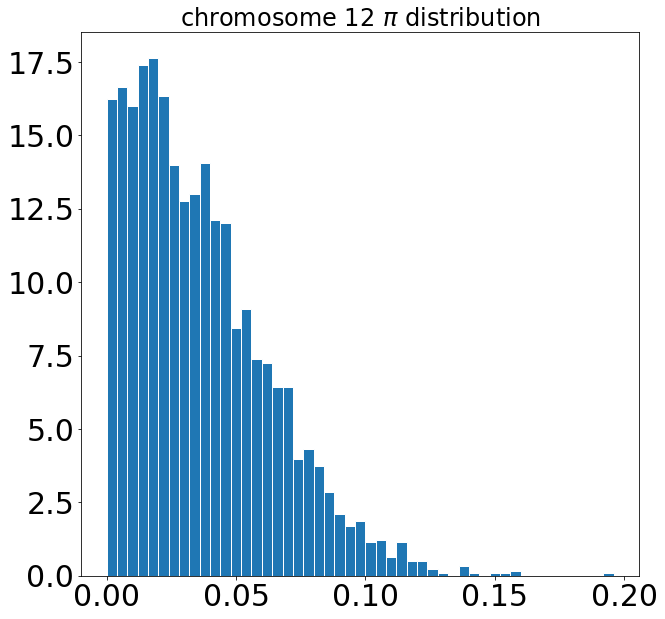

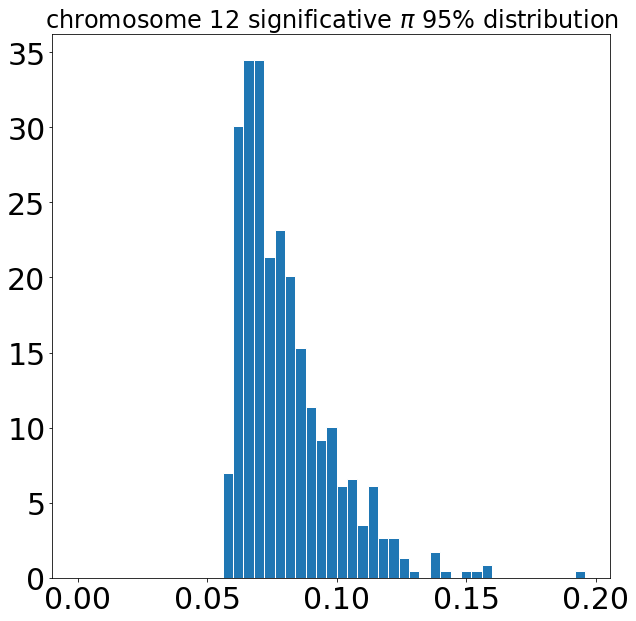

In [9]:
fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr12_1NP_1Mb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr12_1NP_1Mb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 12 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr12_1NP_1Mb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr12_1NP_1Mb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 12 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

### chromosome 18 ###

In [10]:
s = 9158146
rg = Generator(MT19937(s))

print("chromosome 18 1NP 1Mb, seed = ", s , ":\n")

chr18_1NP_1Mb_pi, chr18_1NP_1Mb_sign_pi = single_chromosome('chr18', segregation_table_1NP_1Mb['chr18']['segregation_table'],  95, verbose= True, save= False, ret= True, generator = rg)


chromosome 18 1NP 1Mb, seed =  9158146 :


Computing PIs for chr18 ...
% of NaN PI values: 6.520146520146525 %
% of PI < 0 (out of non-nans): 53.00417972831766 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 7.523510971786834 %
Mean PI value: 0.03436753811475244
STD PI value: 0.026445528414974342
Mean SIGNIFICATIVE PI value: 0.08098467623550684
STD SIGNIFICATIVE PI value: 0.01754566956669315
Done



In [11]:
print( "Percentage of zeros: ", (1 - 0.06520146520146525) * 0.5300417972831766 * 100)
print( "Percentage of significative: ", (1 - 0.06520146520146525) * 0.07523510971786834 * 100)

Percentage of zeros:  49.54822954822954
Percentage of significative:  7.032967032967033


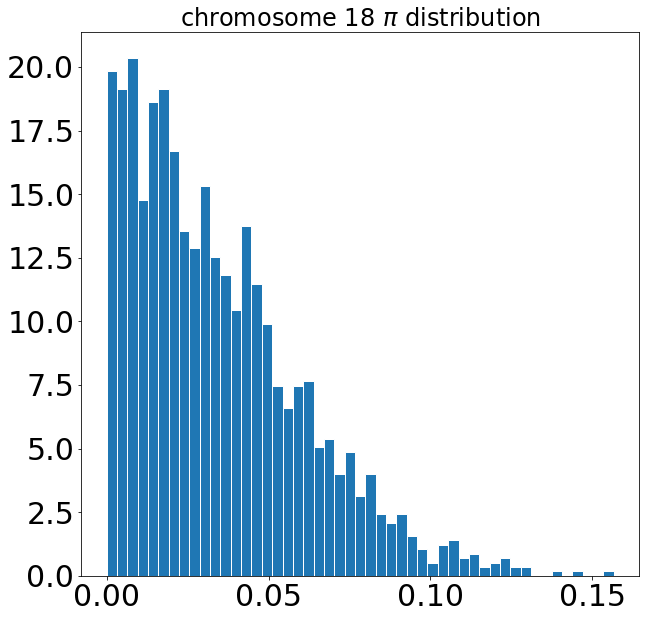

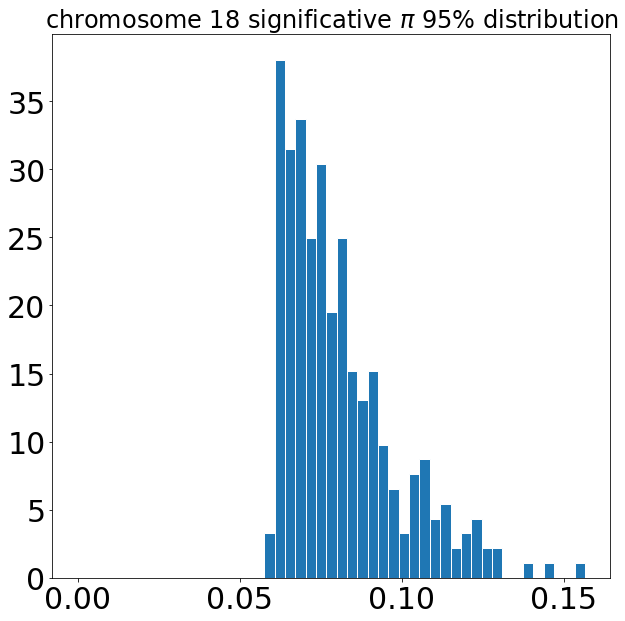

In [12]:
fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr18_1NP_1Mb_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_1NP_1Mb_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 18 $\pi$ distribution", fontsize = 24);

del fig, ax

fig, ax = plt.subplots(figsize = (10,10))
A = ax.hist(chr18_1NP_1Mb_sign_pi.flatten(), bins = np.linspace(0,np.nanmax(chr18_1NP_1Mb_sign_pi), 50), density = True, edgecolor = 'white');
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title("chromosome 18 significative $\pi$ 95% distribution", fontsize = 24);

del fig, ax

### Pi heatmaps ###

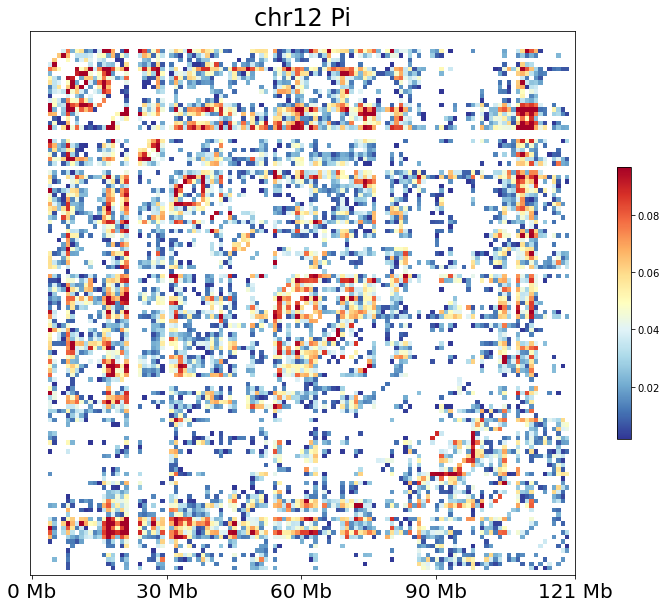

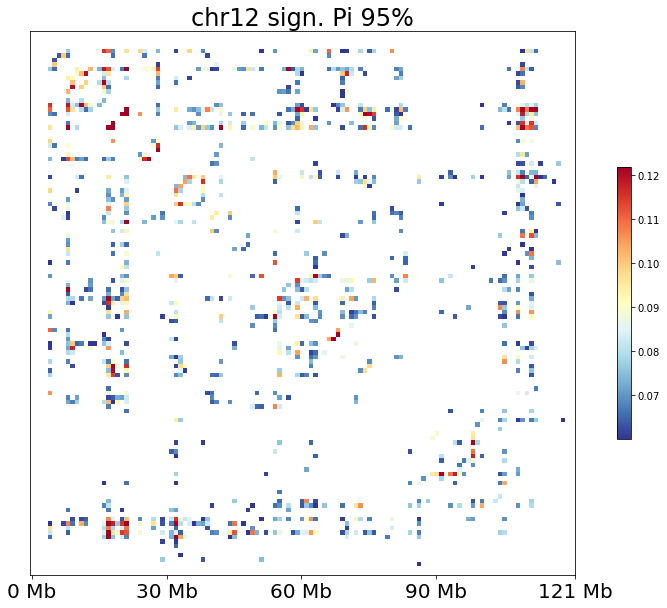

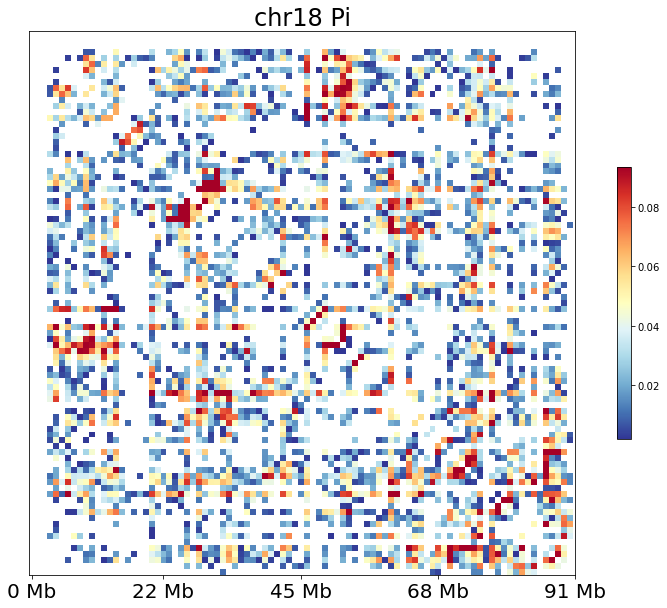

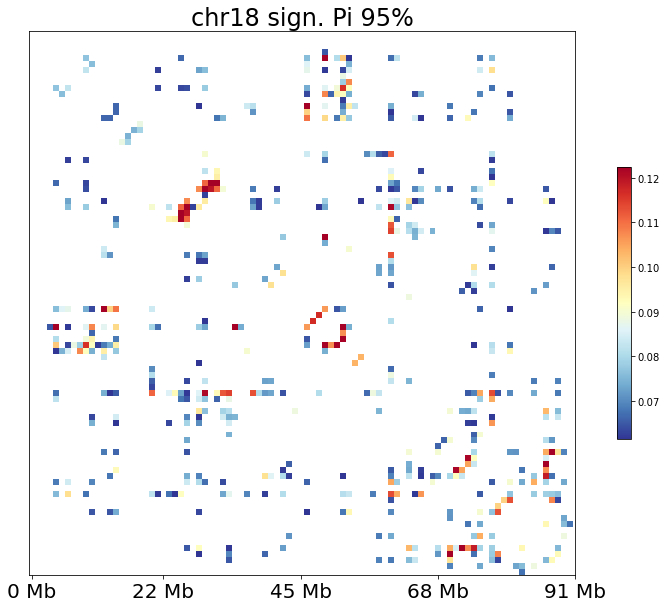

In [25]:
fig1, ax1, _, _ = plot_heatmap(chr12_1NP_1Mb_pi, x_figsize=15, y_figsize=10, colormap="RdYlBu_r");
fig2, ax2, _, _ = plot_heatmap(chr12_1NP_1Mb_sign_pi, x_figsize=15, y_figsize=10, colormap="RdYlBu_r");
fig3, ax3, _, _ = plot_heatmap(chr18_1NP_1Mb_pi, x_figsize=15, y_figsize=10, colormap="RdYlBu_r");
fig4, ax4, _, _ = plot_heatmap(chr18_1NP_1Mb_sign_pi, x_figsize=15, y_figsize=10, colormap="RdYlBu_r");


chr12_ticks = np.linspace(0, chr12_1NP_1Mb_pi.shape[0], 5, dtype=int)
chr12_tick_labels = [str(i) + " Mb" for i in chr12_ticks]
ax1.set_xticks(chr12_ticks)
ax1.set_yticks([])
ax1.set_xticklabels(chr12_tick_labels, fontsize = 20);
ax2.set_xticks(chr12_ticks)
ax2.set_yticks([])
ax2.set_xticklabels(chr12_tick_labels, fontsize = 20);

ax1.set_title("chr12 Pi", fontsize = 24);
ax2.set_title("chr12 sign. Pi 95%", fontsize = 24);


chr18_ticks = np.linspace(0, chr18_1NP_1Mb_pi.shape[0], 5, dtype=int)
chr18_tick_labels = [str(i) + " Mb" for i in chr18_ticks]
ax3.set_xticks(chr18_ticks)
ax3.set_yticks([])
ax3.set_xticklabels(chr18_tick_labels, fontsize = 20);
ax4.set_xticks(chr18_ticks)
ax4.set_yticks([])
ax4.set_xticklabels(chr18_tick_labels, fontsize = 20);

ax3.set_title("chr18 Pi", fontsize = 24);
ax4.set_title("chr18 sign. Pi 95%", fontsize = 24);

Questo di seguito è solo un test per calcolare le beta 

In [14]:
from src.slice_pairwise_inter_beta_evaluation import compute_s_mat_inter as compute_s_mat_inter_beta_eval

In [15]:
F_arr_A, F_arr_B = compute_tube_segregation_frequency_inter(segregation_table_1NP_1Mb['chr12']['segregation_table'], segregation_table_1NP_1Mb['chr18']['segregation_table'])
F_mat = compute_tube_cosegregation_matrix_offdiag(segregation_table_1NP_1Mb['chr12']['segregation_table'], segregation_table_1NP_1Mb['chr18']['segregation_table'])

F_mat[:, np.isnan(F_arr_B)] = np.nan
F_mat[np.isnan(F_arr_A), :] = np.nan

s_mat = compute_s_mat_inter_beta_eval(F_arr_A, F_arr_B, F_mat, effective_NPs_per_tube, F_mean)
print(np.nanmean(s_mat))

del F_arr_A, F_arr_B, F_mat, s_mat

1.364599646158582


# $\beta = 1$ vs $\beta$ evaluated # 

In [16]:
from src.slice_pairwise_inter import inter_chromosome as inter_chromosome_beta_1
from src.slice_pairwise_inter_beta_evaluation import inter_chromosome as inter_chromosome_beta_eval

In [17]:
s = 9564154
rg = Generator(MT19937(s))

print("chromosome 12 and 18 1NP 1Mb", ", beta = 1", ", seed = ", s , ":\n")

chr12_18_1NP_1Mb_pi_beta_1, chr12_18_1NP_1Mb_sign_pi_beta_1 = inter_chromosome_beta_1(segregation_table_1NP_1Mb['chr12']['segregation_table'], segregation_table_1NP_1Mb['chr18']['segregation_table'] , 'chr12', 'chr18', 95, verbose= True, save= False, ret= True, generator = rg)
del s, rg

s = 61468952
rg = Generator(MT19937(s))

print("chromosome 12 and 18 1NP 1Mb", ", beta evaluated", ", seed = ", s , ":\n")

chr12_18_1NP_1Mb_pi_beta_eval, chr12_18_1NP_1Mb_sign_pi_beta_eval = inter_chromosome_beta_eval(segregation_table_1NP_1Mb['chr12']['segregation_table'], segregation_table_1NP_1Mb['chr18']['segregation_table'] , 'chr12', 'chr18', 95, verbose= True, save= False, ret= True, generator = rg)

chromosome 12 and 18 1NP 1Mb , beta = 1 , seed =  9564154 :


Computing inter PIs for chr12 and chr18 ...
% of NaN PI values: 9.69030969030969 %
% of PI < 0 (out of non-nans): 24.487127916331456 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 32.54223652453741 %
Mean PI value: 0.023889762918336707
STD PI value: 0.015581794634795572
Mean SIGNIFICATIVE PI value: 0.038656870326211776
STD SIGNIFICATIVE PI value: 0.01070673174926236
Done

chromosome 12 and 18 1NP 1Mb , beta evaluated , seed =  61468952 :


Computing inter PIs for chr12 and chr18 ...
% of NaN PI values: 9.69030969030969 %
% of PI < 0 (out of non-nans): 49.798873692679 %
% of PI > 1 (out of non-nans): 0.0 %
Percentage of significative PIs: 11.62510056315366 %
Mean PI value: 0.017680878717409615
STD PI value: 0.012953834502582943
Mean SIGNIFICATIVE PI value: 0.036649657150988314
STD SIGNIFICATIVE PI value: 0.008689871423191036
beta: 1.364599646158582
Done



In [18]:
print( "Percentage of zeros in b = 1: ", (1 - 0.0969030969030969) * 0.24487127916331456 * 100)
print( "Percentage of significative in b = 1: ", (1 - 0.0969030969030969) * 0.3254223652453741 * 100)

print( "Percentage of zeros in b eval: ", (1 - 0.0969030969030969) *  0.49798873692679 * 100)
print( "Percentage of significative in b eval: ", (1 - 0.0969030969030969) * 0.1162510056315366 * 100)

Percentage of zeros in b = 1:  22.114249386976663
Percentage of significative in b = 1:  29.388793025156662
Percentage of zeros in b eval:  44.97320860957225
Percentage of significative in b eval:  10.498592316774136


## Heatmaps ##

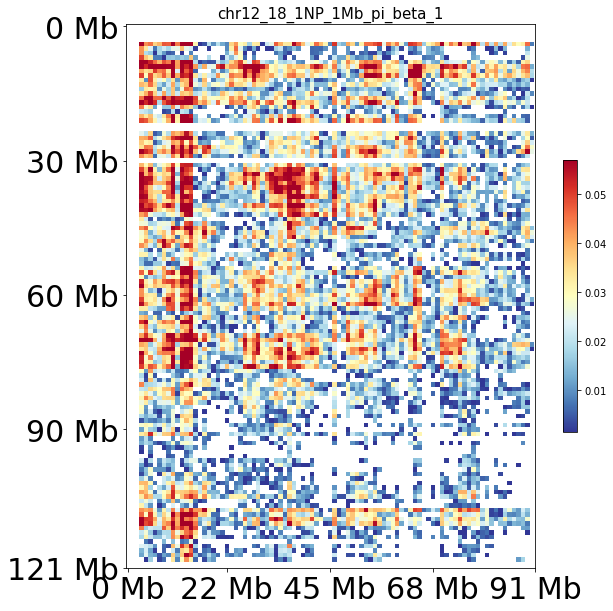

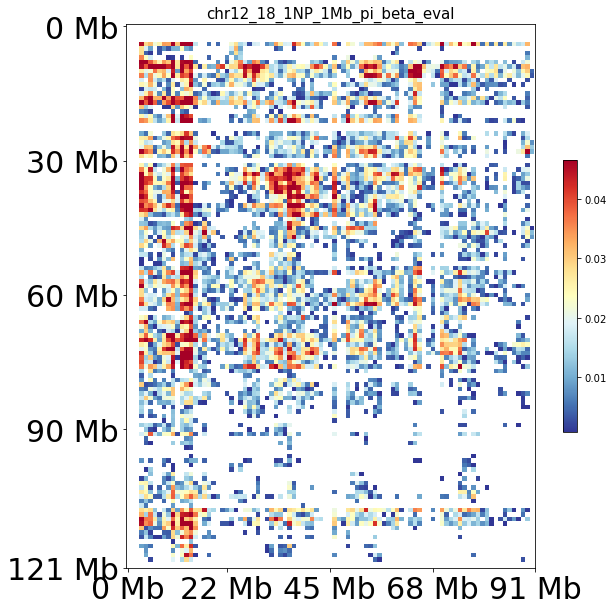

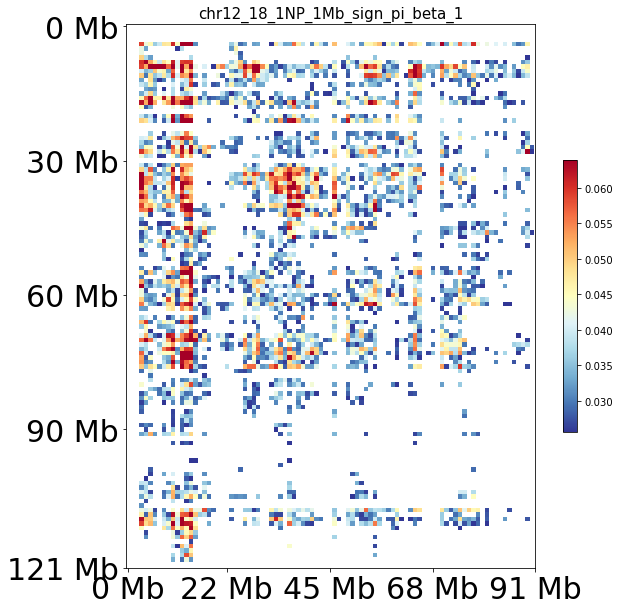

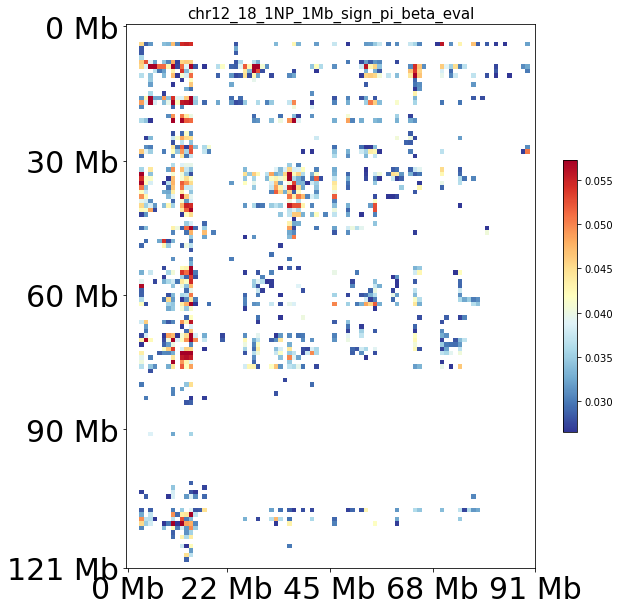

In [19]:
fig1, ax1, _, _ = plot_heatmap(chr12_18_1NP_1Mb_pi_beta_1, x_figsize=10, y_figsize=10, title = "chr12_18_1NP_1Mb_pi_beta_1" , colormap="RdYlBu_r");
fig2, ax2, _, _ = plot_heatmap(chr12_18_1NP_1Mb_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr12_18_1NP_1Mb_pi_beta_eval", colormap="RdYlBu_r");
fig3, ax3, _, _ = plot_heatmap(chr12_18_1NP_1Mb_sign_pi_beta_1, x_figsize=10, y_figsize=10, title = "chr12_18_1NP_1Mb_sign_pi_beta_1", colormap="RdYlBu_r");
fig4, ax4, _, _ = plot_heatmap(chr12_18_1NP_1Mb_sign_pi_beta_eval, x_figsize=10, y_figsize=10, title = "chr12_18_1NP_1Mb_sign_pi_beta_eval", colormap="RdYlBu_r");

chr12_ticks = np.linspace(0, chr12_18_1NP_1Mb_pi_beta_1.shape[1], 5, dtype=int)
chr12_tick_labels = [str(i) + " Mb" for i in chr12_ticks]

chr18_ticks = np.linspace(0, chr12_18_1NP_1Mb_pi_beta_1.shape[0], 5, dtype=int)
chr18_tick_labels = [str(i) + " Mb" for i in chr18_ticks]

for i in [ax1, ax2, ax3, ax4]:
    i.set_xticks(chr12_ticks)
    i.set_yticks(chr18_ticks)
    i.set_xticklabels(chr12_tick_labels, fontsize = 30);
    i.set_yticklabels(chr18_tick_labels, fontsize = 30);


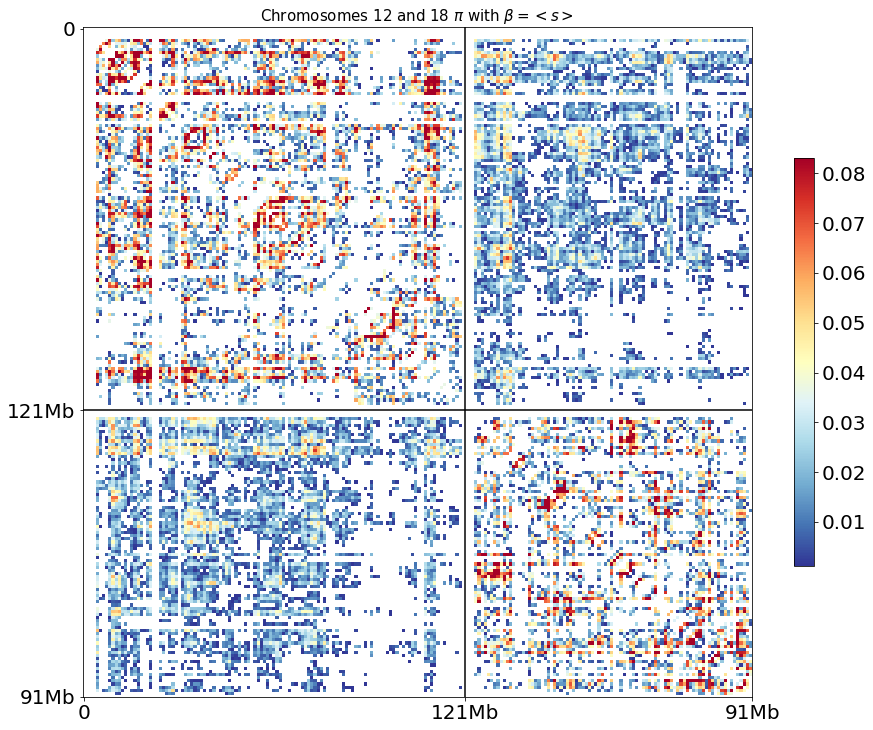

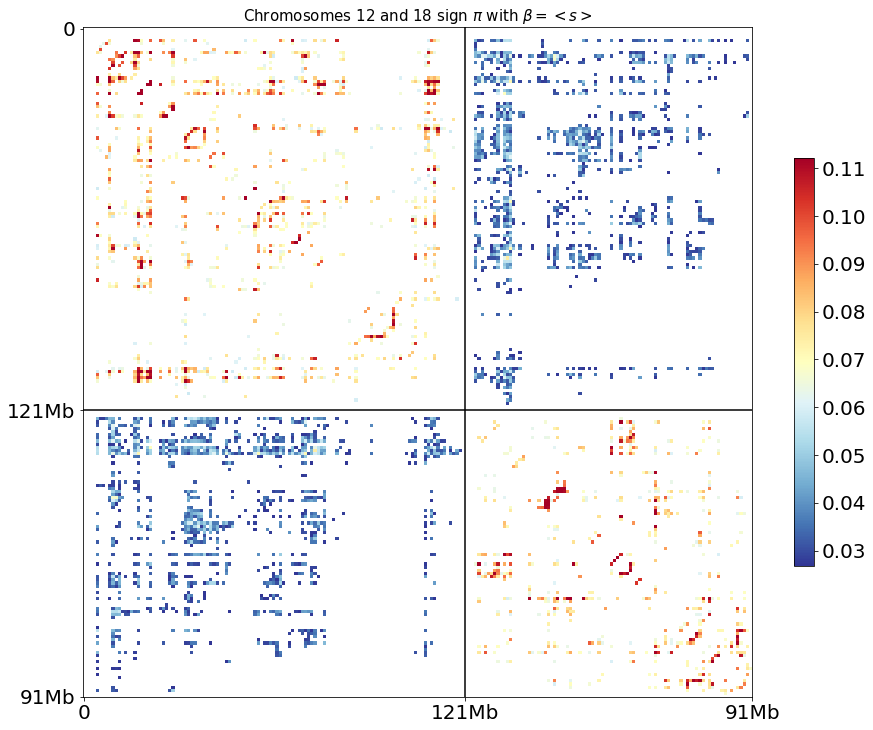

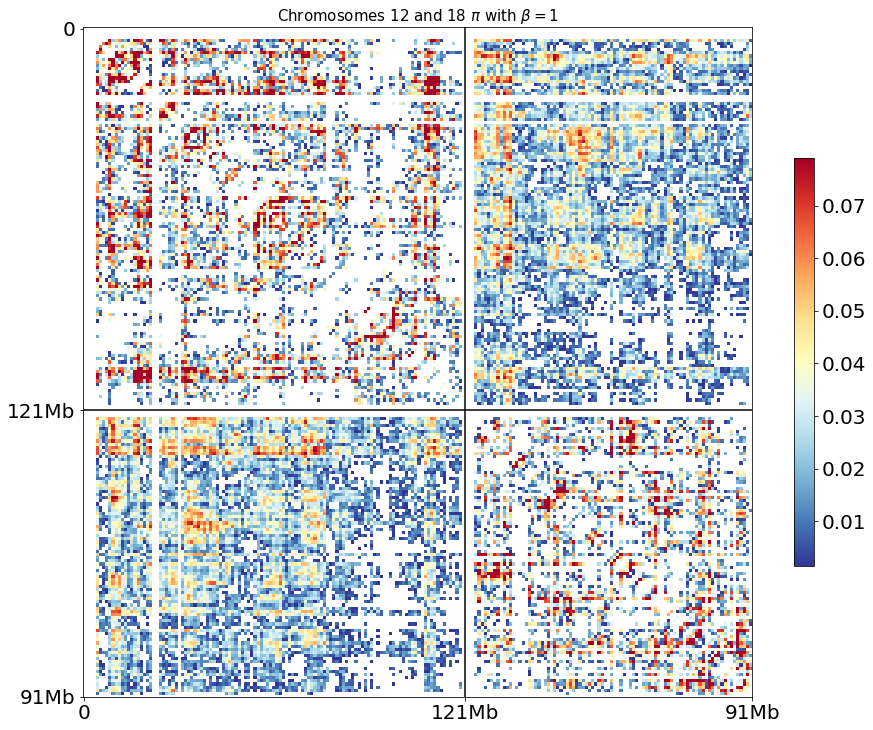

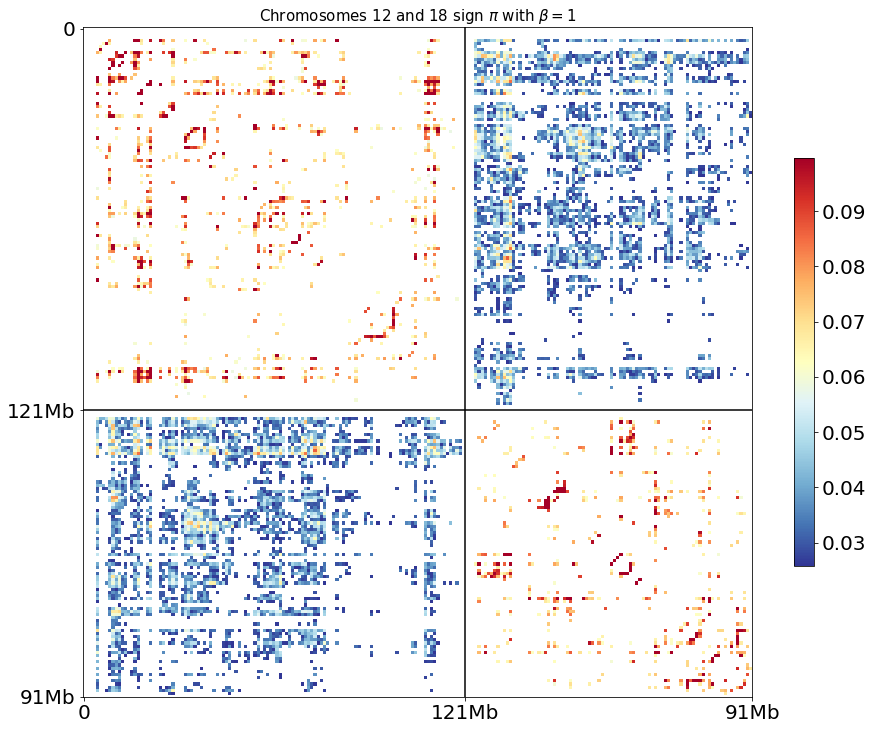

In [22]:
fig1, _, _ = plot_heatmap_two_chromosomes(chr12_1NP_1Mb_pi, chr18_1NP_1Mb_pi, chr12_18_1NP_1Mb_pi_beta_eval, title = "Chromosomes 12 and 18 $\pi$ with $\\beta = <s>$", colormap = "RdYlBu_r");
fig2, _, _ = plot_heatmap_two_chromosomes(chr12_1NP_1Mb_sign_pi, chr18_1NP_1Mb_sign_pi, chr12_18_1NP_1Mb_sign_pi_beta_eval, title = "Chromosomes 12 and 18 sign $\pi$ with $\\beta = <s>$", colormap = "RdYlBu_r");
fig3, _, _ = plot_heatmap_two_chromosomes(chr12_1NP_1Mb_pi, chr18_1NP_1Mb_pi, chr12_18_1NP_1Mb_pi_beta_1, title = "Chromosomes 12 and 18 $\pi$ with $\\beta = 1$", colormap = "RdYlBu_r");
fig4, _, _ = plot_heatmap_two_chromosomes(chr12_1NP_1Mb_sign_pi, chr18_1NP_1Mb_sign_pi, chr12_18_1NP_1Mb_sign_pi_beta_1, title = "Chromosomes 12 and 18 sign $\pi$ with $\\beta = 1$", colormap = "RdYlBu_r");

fig1.savefig('/home/federico/Università/Tesi_magistrale/images/interPI_chr12_chr18.ipynb_output/pi/chr12_18_1NP_1Mb_pi_beta_eval.svg', format = 'svg')
fig2.savefig('/home/federico/Università/Tesi_magistrale/images/interPI_chr12_chr18.ipynb_output/pi/chr12_18_1NP_1Mb_sign_pi_beta_eval.svg', format = 'svg')
fig3.savefig('/home/federico/Università/Tesi_magistrale/images/interPI_chr12_chr18.ipynb_output/pi/chr12_18_1NP_1Mb_pi_beta_1.svg', format = 'svg')
fig4.savefig('/home/federico/Università/Tesi_magistrale/images/interPI_chr12_chr18.ipynb_output/pi/chr12_18_1NP_1Mb_sign_pi_beta_1.svg', format = 'svg')

del fig1, fig2, fig3, fig4

## Histograms ##

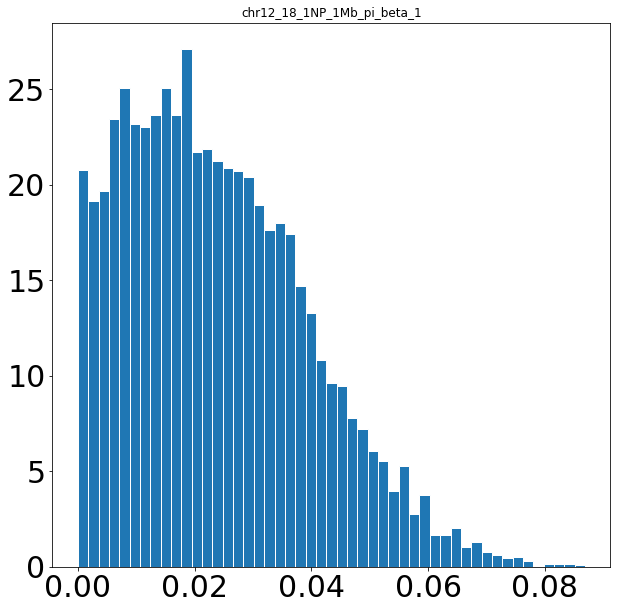

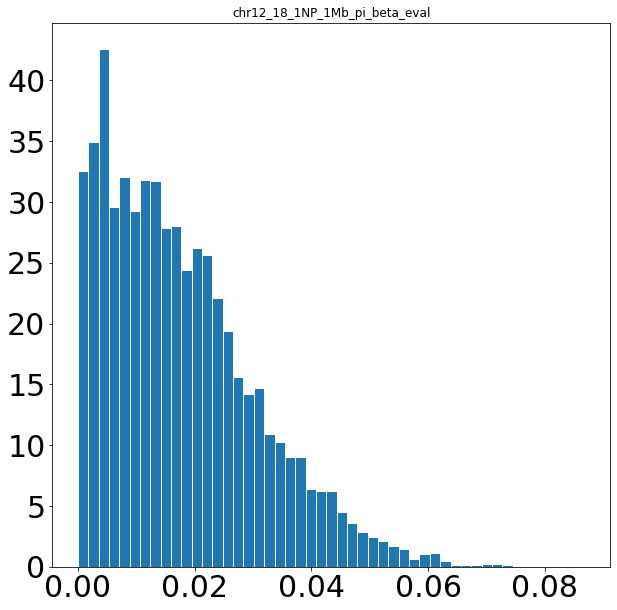

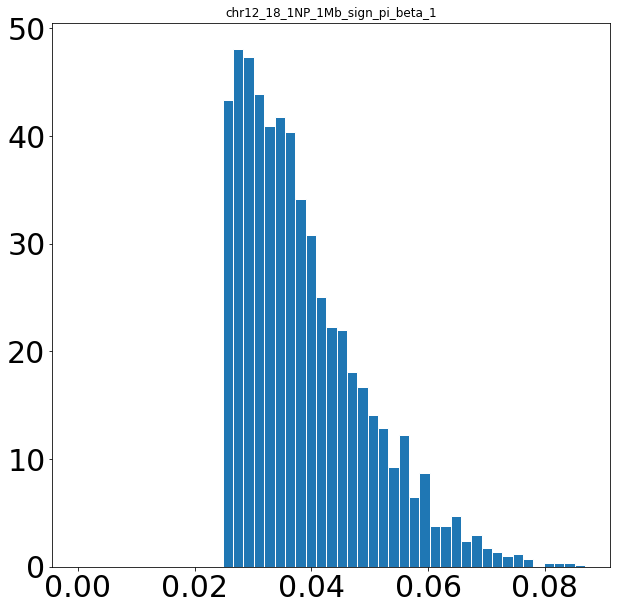

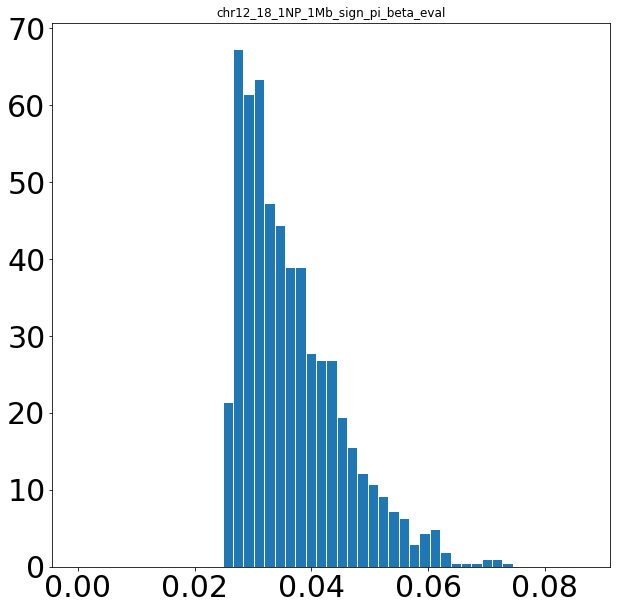

In [21]:
fig1, ax1 = plt.subplots(1, figsize = (10,10))
fig2, ax2 = plt.subplots(1, figsize = (10,10))
fig3, ax3 = plt.subplots(1, figsize = (10,10))
fig4, ax4 = plt.subplots(1, figsize = (10,10))

A = ax1.hist(chr12_18_1NP_1Mb_pi_beta_1.flatten(), bins = np.linspace(0,np.nanmax(chr12_18_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax1.set_title("chr12_18_1NP_1Mb_pi_beta_1")

B = ax2.hist(chr12_18_1NP_1Mb_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr12_18_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax2.set_title("chr12_18_1NP_1Mb_pi_beta_eval")

C = ax3.hist(chr12_18_1NP_1Mb_sign_pi_beta_1.flatten(), bins = np.linspace(0,np.nanmax(chr12_18_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax3.set_title("chr12_18_1NP_1Mb_sign_pi_beta_1")
D = ax4.hist(chr12_18_1NP_1Mb_sign_pi_beta_eval.flatten(), bins = np.linspace(0,np.nanmax(chr12_18_1NP_1Mb_pi_beta_1), 50), edgecolor = "white", density = True)
ax4.set_title("chr12_18_1NP_1Mb_sign_pi_beta_eval")

ax1.tick_params(axis='x', which='major', labelsize=30)
ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax2.tick_params(axis='y', which='major', labelsize=30)
ax3.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='y', which='major', labelsize=30)
ax4.tick_params(axis='x', which='major', labelsize=30)
ax4.tick_params(axis='y', which='major', labelsize=30)


del A, B, C, D

## Stats ##

In [22]:
print( "chr12_18_1NP_1Mb_pi_beta_1:\t\t" , np.nanmean(chr12_18_1NP_1Mb_pi_beta_1),         np.nanstd(chr12_18_1NP_1Mb_pi_beta_1))
print( "chr12_18_1NP_1Mb_sign_pi_beta_1:\t\t" , np.nanmean(chr12_18_1NP_1Mb_sign_pi_beta_1),    np.nanstd(chr12_18_1NP_1Mb_sign_pi_beta_1))
print( "chr12_18_1NP_1Mb_pi_beta_eval:\t\t" , np.nanmean(chr12_18_1NP_1Mb_pi_beta_eval),      np.nanstd(chr12_18_1NP_1Mb_pi_beta_eval))
print( "chr12_18_1NP_1Mb_sign_pi_beta_eval:\t" , np.nanmean(chr12_18_1NP_1Mb_sign_pi_beta_eval), np.nanstd(chr12_18_1NP_1Mb_sign_pi_beta_eval))

chr12_18_1NP_1Mb_pi_beta_1:		 0.023889762918336707 0.015581794634795572
chr12_18_1NP_1Mb_sign_pi_beta_1:		 0.038656870326211776 0.01070673174926236
chr12_18_1NP_1Mb_pi_beta_eval:		 0.017680878717409615 0.012953834502582943
chr12_18_1NP_1Mb_sign_pi_beta_eval:	 0.036649657150988314 0.008689871423191036


## Significative pi comparison with intra ##

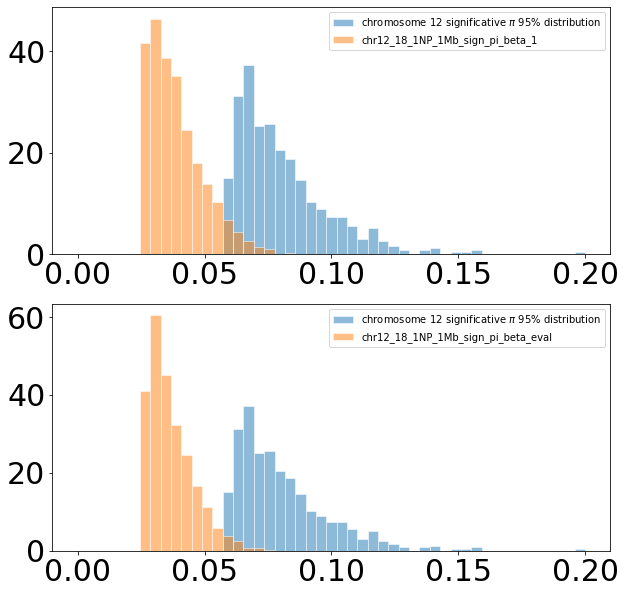

In [23]:
fig, ax = plt.subplots(2, figsize = (10,10))

bins_ = np.linspace(0,np.nanmax(0.2), 50)

A = ax[0].hist(chr12_1NP_1Mb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 12 significative $\pi$ 95% distribution", alpha = 0.5);
#B = ax.hist(chr18_1NP_1Mb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 18 significative $\pi$ 95% distribution", alpha = 0.5);
C = ax[0].hist(chr12_18_1NP_1Mb_sign_pi_beta_1.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr12_18_1NP_1Mb_sign_pi_beta_1", alpha = 0.5)
#D = ax.hist(chr12_18_1NP_1Mb_sign_pi_beta_eval.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr12_18_1NP_1Mb_sign_pi_beta_eval", alpha = 0.5 )


A = ax[1].hist(chr12_1NP_1Mb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 12 significative $\pi$ 95% distribution", alpha = 0.5);
#B = ax.hist(chr18_1NP_1Mb_sign_pi.flatten(), bins = bins_, density = True, edgecolor = 'white', label = "chromosome 18 significative $\pi$ 95% distribution", alpha = 0.5);
#C = ax.hist(chr12_18_1NP_1Mb_sign_pi_beta_1.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr12_18_1NP_1Mb_sign_pi_beta_1", alpha = 0.5)
D = ax[1].hist(chr12_18_1NP_1Mb_sign_pi_beta_eval.flatten(), bins = bins_, edgecolor = "white", density = True, label = "chr12_18_1NP_1Mb_sign_pi_beta_eval", alpha = 0.5 )

ax[0].legend()

ax[0].tick_params(axis='x', which='major', labelsize=30)
ax[0].tick_params(axis='y', which='major', labelsize=30)

ax[1].legend()

ax[1].tick_params(axis='x', which='major', labelsize=30)
ax[1].tick_params(axis='y', which='major', labelsize=30)

del fig, ax

# coseg - $\pi$ correlations #

pearson			spearman
 0.5132995827091477 	 0.5414247422471936
pearson			spearman
 0.52257395078387 	 0.5400934535545872
pearson			spearman
 0.9174693962972271 	 0.9146745133159933
pearson			spearman
 0.8678533622365283 	 0.8456481300972922


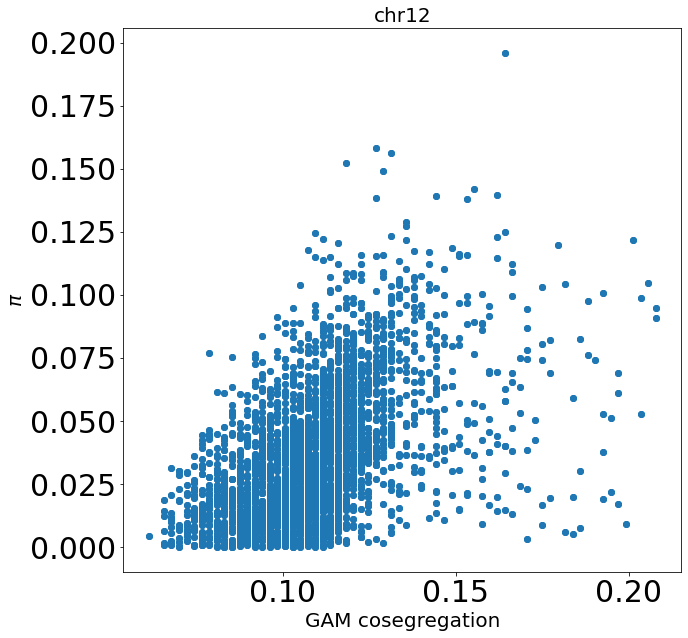

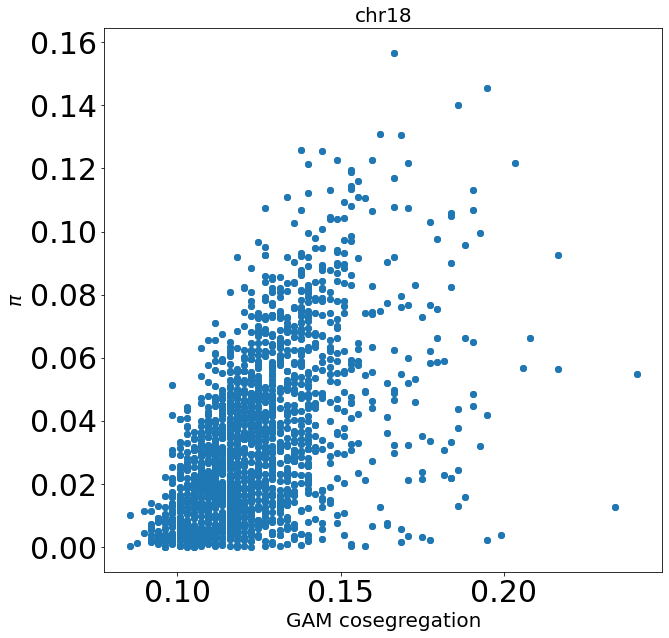

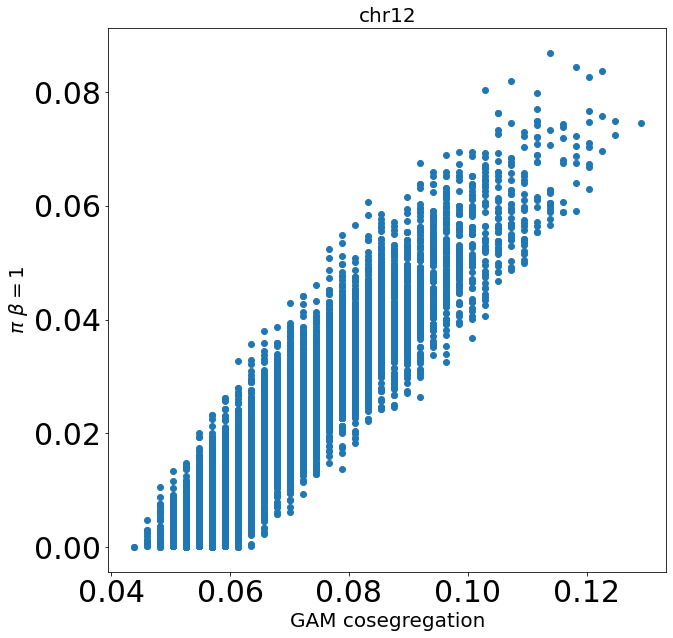

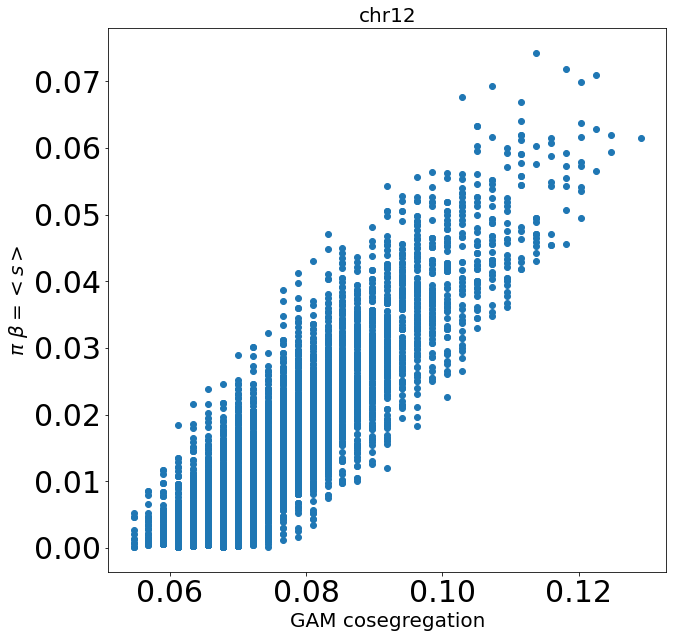

In [24]:
matrix_correlation(chr12_1NP_1Mb_coseg, chr12_1NP_1Mb_pi, verbose_print=True)
scatter_matrices(chr12_1NP_1Mb_coseg, chr12_1NP_1Mb_pi, x_label="GAM cosegregation", y_label="$\pi$", title="chr12");

matrix_correlation(chr18_1NP_1Mb_coseg, chr18_1NP_1Mb_pi, verbose_print=True)
scatter_matrices(chr18_1NP_1Mb_coseg, chr18_1NP_1Mb_pi, x_label="GAM cosegregation", y_label="$\pi$", title="chr18");

matrix_correlation(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_pi_beta_1, verbose_print=True)
scatter_matrices(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_pi_beta_1, x_label="GAM cosegregation", y_label="$\pi$ $\\beta = 1$", title="chr12");

matrix_correlation(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_pi_beta_eval, verbose_print=True)
scatter_matrices(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_pi_beta_eval, x_label="GAM cosegregation", y_label="$\pi$ $\\beta = <s>$", title="chr12");

pearson			spearman
 0.3766442720985137 	 0.428247179239398
pearson			spearman
 0.4762659075339335 	 0.4780464119812973
pearson			spearman
 0.8168701420914777 	 0.7752034083819597
pearson			spearman
 0.7146052951843587 	 0.669161752104778


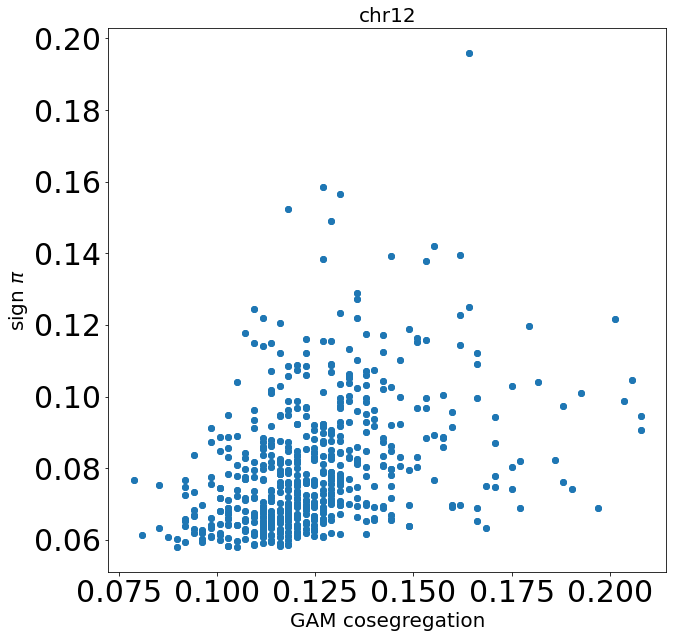

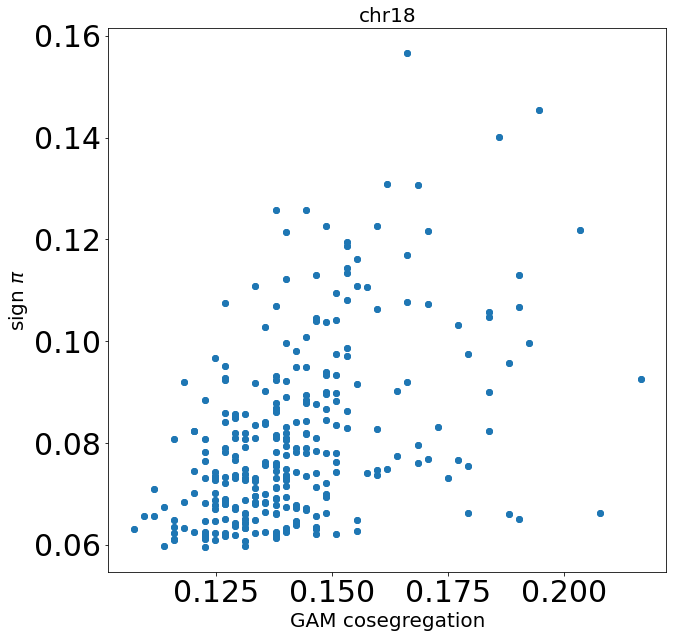

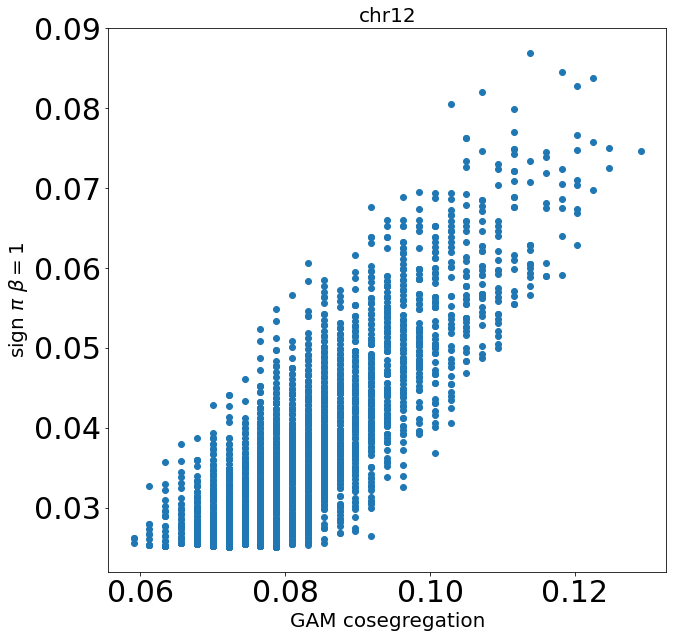

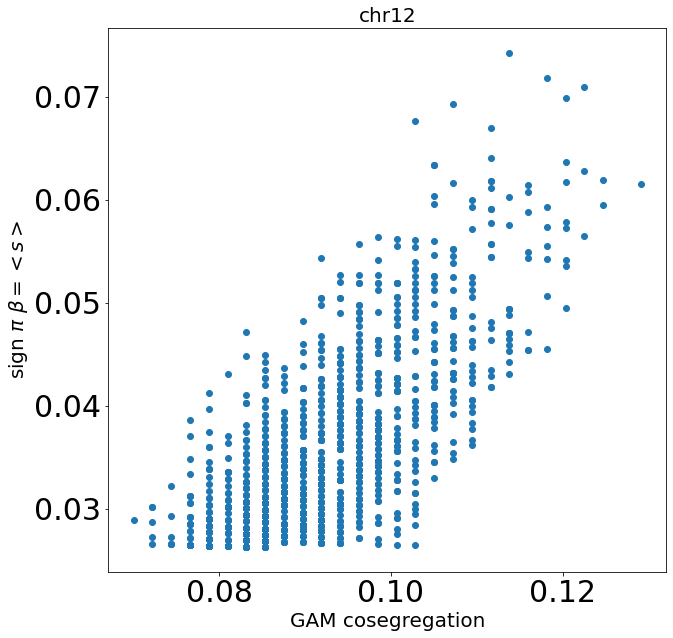

In [25]:
matrix_correlation(chr12_1NP_1Mb_coseg, chr12_1NP_1Mb_sign_pi, verbose_print=True)
scatter_matrices(chr12_1NP_1Mb_coseg, chr12_1NP_1Mb_sign_pi, x_label="GAM cosegregation", y_label="sign $\pi$", title="chr12");

matrix_correlation(chr18_1NP_1Mb_coseg, chr18_1NP_1Mb_sign_pi, verbose_print=True)
scatter_matrices(chr18_1NP_1Mb_coseg, chr18_1NP_1Mb_sign_pi, x_label="GAM cosegregation", y_label="sign $\pi$", title="chr18");

matrix_correlation(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_sign_pi_beta_1, verbose_print=True)
scatter_matrices(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_sign_pi_beta_1, x_label="GAM cosegregation", y_label="sign $\pi$ $\\beta = 1$", title="chr12");

matrix_correlation(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_sign_pi_beta_eval, verbose_print=True)
scatter_matrices(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_sign_pi_beta_eval, x_label="GAM cosegregation", y_label="sign $\pi$ $\\beta = <s>$", title="chr12");

# F_i x F_j #

In [26]:

F_arr_genomewide_1NP_1Mb = np.array([])

chr_list = ["chr1", "chr2", "chr3", "chr4",
                             "chr5", "chr6", "chr7", "chr8",
                             "chr9", "chr10", "chr11", "chr12",
                             "chr13", "chr14", "chr15", "chr16",
                             "chr17", "chr18", "chr19"]

for chr in chr_list:
    segregation_table = segregation_table_1NP_1Mb[chr]["segregation_table"]
    F_arr = compute_tube_segregation_frequency(segregation_table)
    F_arr_genomewide_1NP_1Mb = np.concatenate((F_arr_genomewide_1NP_1Mb, F_arr))
    del F_arr

del segregation_table
F_i_outer_Fj_1NP_1Mb = np.outer(F_arr_genomewide_1NP_1Mb, F_arr_genomewide_1NP_1Mb)
F_i_outer_Fj_1NP_1Mb[F_i_outer_Fj_1NP_1Mb == 0] = np.nan
np.fill_diagonal(F_i_outer_Fj_1NP_1Mb, np.nan)
chr12_start, chr12_end, chr18_start, chr18_end = select_chromosomes_coordinates(12, 18, chr_windows_sizes)

pearson			spearman
 0.35114593969649693 	 0.32809274092798485
pearson			spearman
 0.8678533622365283 	 0.8456481300972922


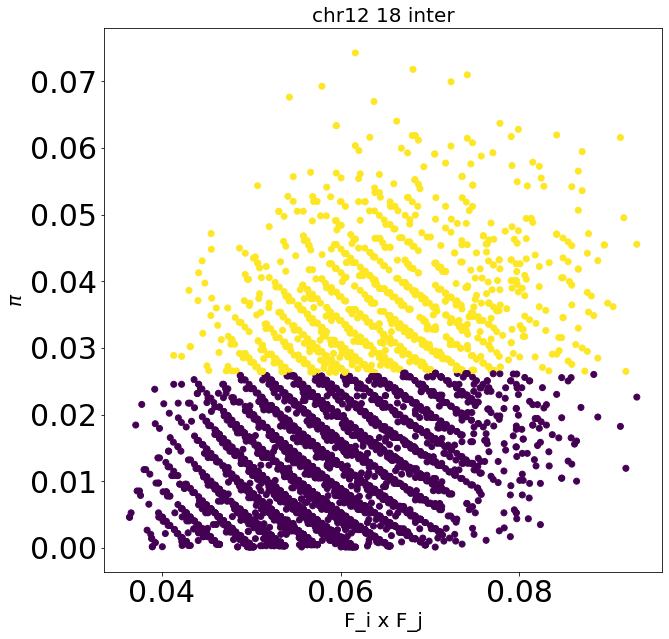

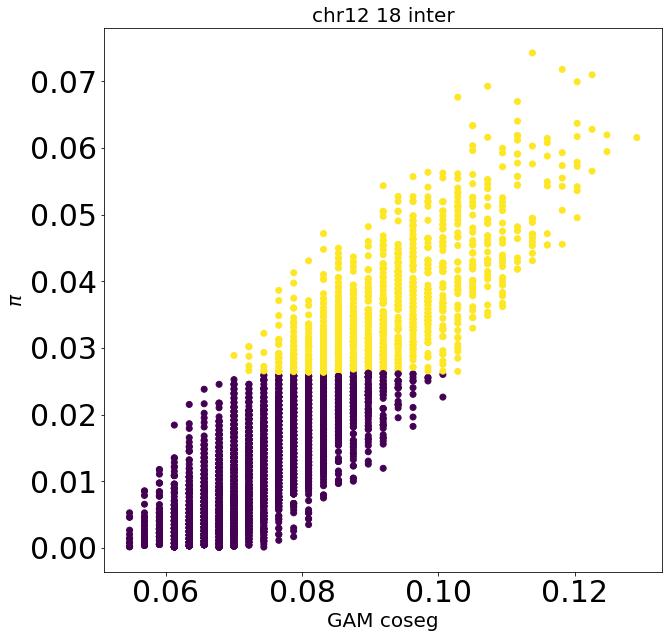

In [27]:

matrix_correlation(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_pi_beta_eval, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_pi_beta_eval, x_label="F_i x F_j", y_label="$\pi$", title="chr12 18 inter", 
    colors = (chr12_18_1NP_1Mb_sign_pi_beta_eval == chr12_18_1NP_1Mb_sign_pi_beta_eval).astype(int) );

matrix_correlation(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_pi_beta_eval, verbose_print=True)
scatter_matrices(chr12_18_1NP_1Mb_coseg, chr12_18_1NP_1Mb_pi_beta_eval, x_label="GAM coseg", y_label="$\pi$", title="chr12 18 inter", 
    colors = (chr12_18_1NP_1Mb_sign_pi_beta_eval == chr12_18_1NP_1Mb_sign_pi_beta_eval).astype(int) );



## correlations of $F_i x F_j$ in intra chr12 ##

pearson			spearman
 0.6406115101424354 	 0.6900496301845167
pearson			spearman
 0.09103955643311384 	 0.13334543643869343
pearson			spearman
 0.21829904353112528 	 0.23268780399185796
pearson			spearman
 0.21829904353112528 	 0.23268780399185796


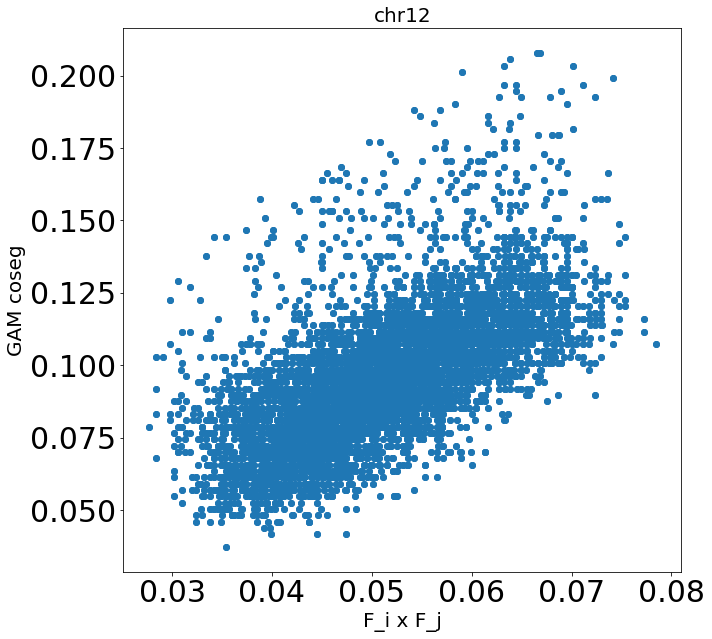

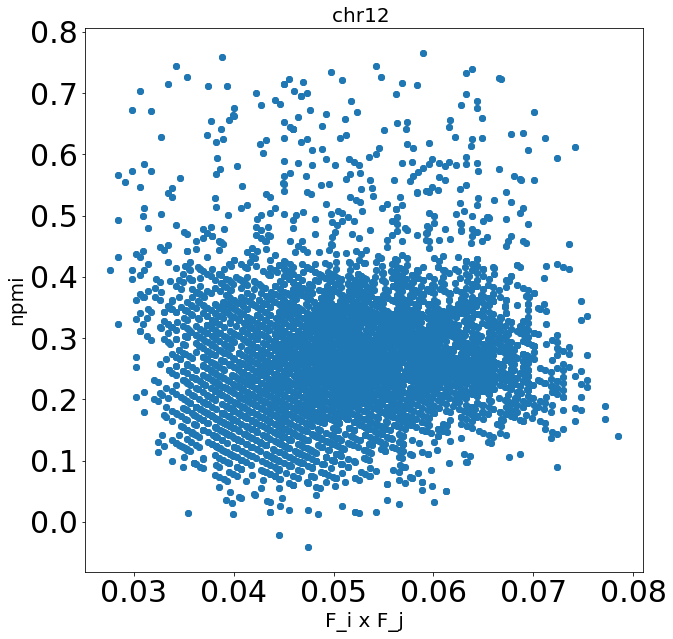

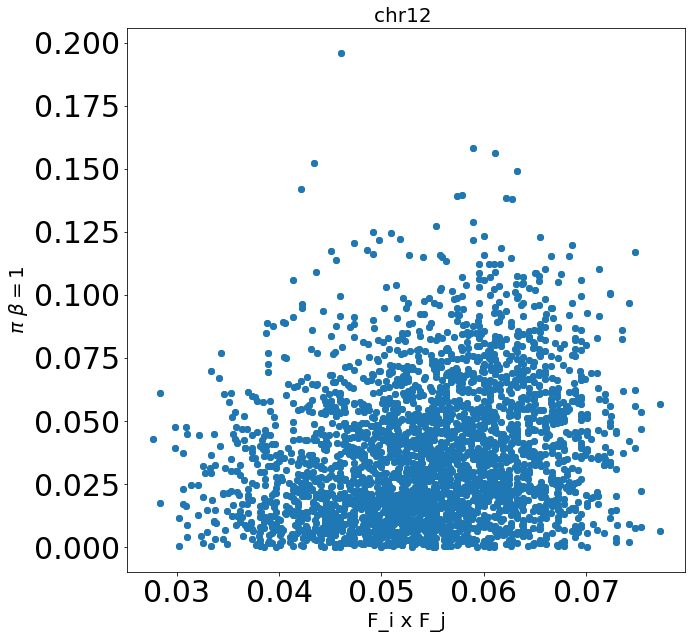

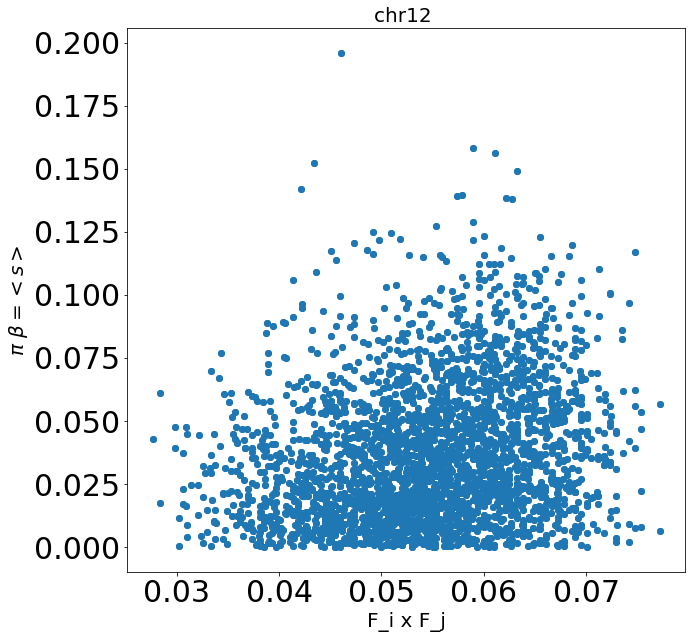

In [28]:

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_coseg, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_coseg, x_label="F_i x F_j", y_label="GAM coseg", title="chr12");

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_npmi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_npmi, x_label="F_i x F_j", y_label="npmi", title="chr12 ");

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_pi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_pi, x_label="F_i x F_j", y_label="$\pi$ $\\beta = 1$", title="chr12 ");

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_pi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr12_start:chr12_end], chr12_1NP_1Mb_pi, x_label="F_i x F_j", y_label="$\pi$ $\\beta = <s>$", title="chr12 ");


## correlations of $F_i x F_j$ in inter chr12 18 ##

pearson			spearman
 0.7955967872428926 	 0.7827722465759269
pearson			spearman
 0.2354271762411137 	 0.22831528577496676
pearson			spearman
 0.4559439400680907 	 0.43998551029940913
pearson			spearman
 0.35114593969649693 	 0.32809274092798485


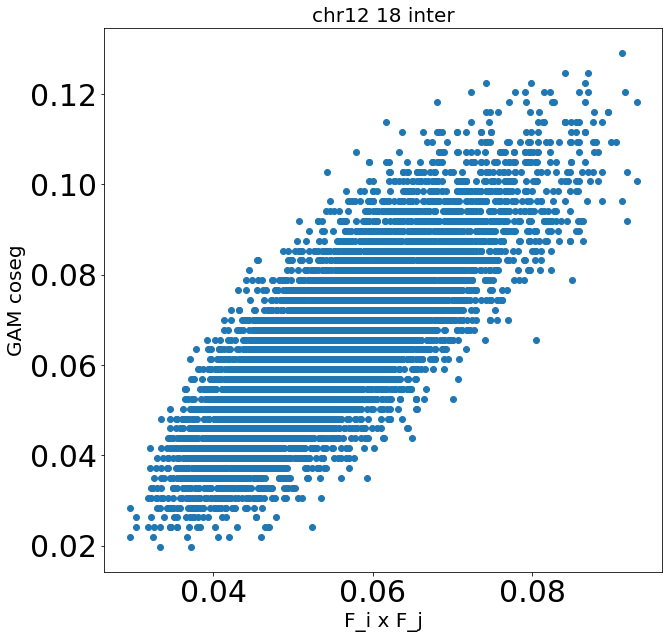

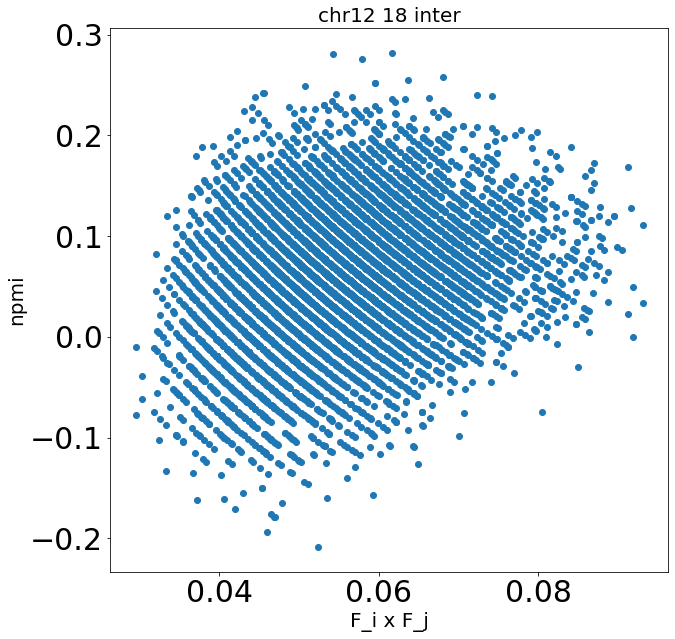

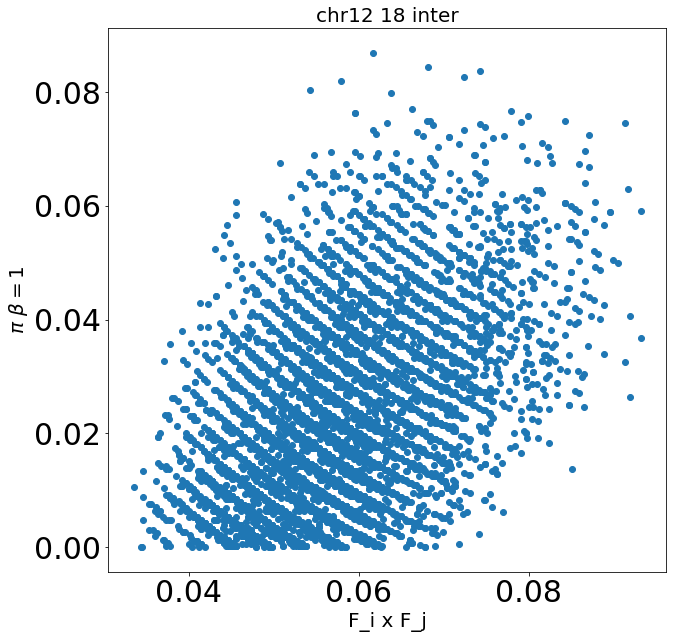

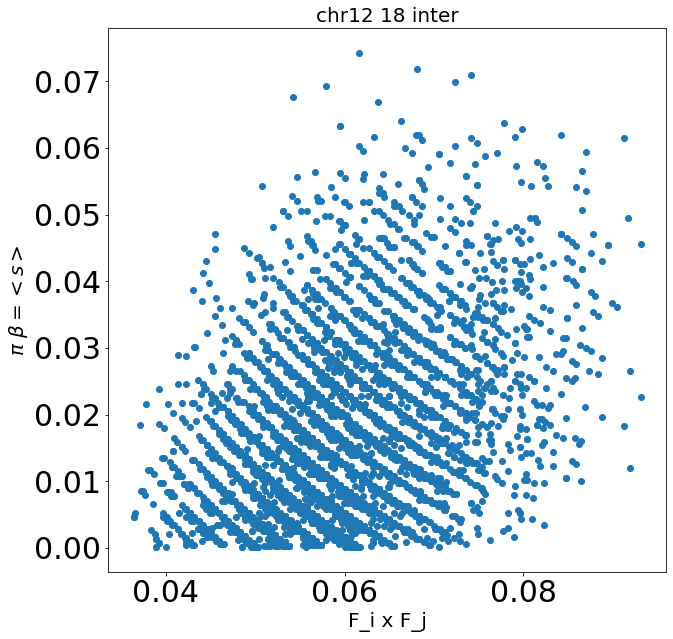

In [29]:

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_coseg, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_coseg, x_label="F_i x F_j", y_label="GAM coseg", title="chr12 18 inter");

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_npmi, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_npmi, x_label="F_i x F_j", y_label="npmi", title="chr12 18 inter");

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_pi_beta_1, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_pi_beta_1, x_label="F_i x F_j", y_label="$\pi$ $\\beta = 1$", title="chr12 18 inter");

matrix_correlation( F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_pi_beta_eval, verbose_print=True)
scatter_matrices(F_i_outer_Fj_1NP_1Mb[chr12_start:chr12_end, chr18_start:chr18_end], chr12_18_1NP_1Mb_pi_beta_eval, x_label="F_i x F_j", y_label="$\pi$ $\\beta = <s>$", title="chr12 18 inter");




# Hi-C data #

In [30]:
import hicstraw

In [31]:
hic_file_name = "/home/federico/Università/Tesi_magistrale/Yan_et_al_2018/" + "4DNFI3JYF9VS.hic"
hic = hicstraw.HiCFile(hic_file_name)
chr1 = hic.getChromosomes()[1]
print(chr1.length)
print(hic.getResolutions())

195471971
[10000000, 5000000, 2500000, 1000000, 500000, 250000, 100000, 50000, 25000, 10000, 5000, 2000, 1000]


In [32]:
gw_hic = np.zeros((size, size))


for i in tqdm(range(n_chromosomes), leave=True):
    for j in tqdm(range(i, n_chromosomes), leave=False):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
                

        if i==j:
            current_chrom_hic = hic.getChromosomes()[i+1]
            name = current_chrom_hic.name
            start = 0;  end = current_chrom_hic.length 
            mzd = hic.getMatrixZoomData(name, name, "observed", "KR", "BP", 1000000)
            mat = mzd.getRecordsAsMatrix(start, end, start,end)
            gw_hic[start_row:stop_row, start_column:stop_column] = mat
            
        else:

            current_chrom_hic_1 = hic.getChromosomes()[i+1]
            current_chrom_hic_2 = hic.getChromosomes()[j+1]
            name_1 = current_chrom_hic_1.name
            name_2 = current_chrom_hic_2.name
            start_1 = 0;  end_1 = current_chrom_hic_1.length 
            start_2 = 0;  end_2 = current_chrom_hic_2.length 
            
            mzd = hic.getMatrixZoomData(name_1, name_2, "observed", "KR", "BP", 1000000)
            mat = mzd.getRecordsAsMatrix(start_1, end_1, start_2,end_2)
            gw_hic[start_row:stop_row, start_column:stop_column] = mat

gw_hic[gw_hic == 0] = np.nan

100%|██████████| 19/19 [00:00<00:00, 32.75it/s]


## Hi-C ##

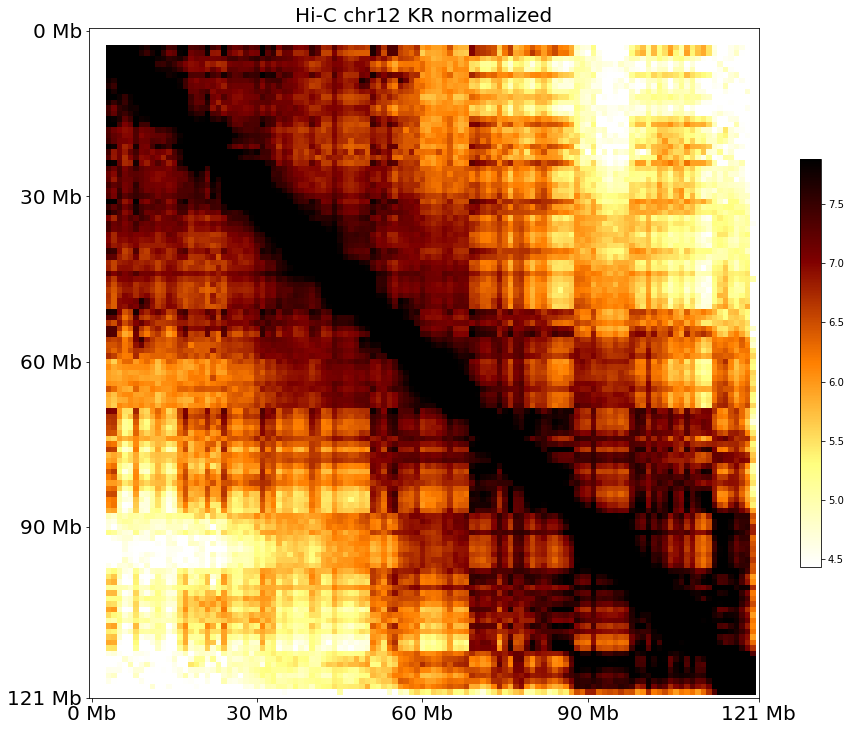

In [33]:
chr12_start, chr12_end, chr18_start, chr18_end = select_chromosomes_coordinates(12, 18, chr_windows_sizes)
hic_selected_locus = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]

fig, ax, c, _ = plot_heatmap(np.log(hic_selected_locus), vmin = np.log(np.nanpercentile(hic_selected_locus, 3)), vmax = np.log(np.nanpercentile(hic_selected_locus, 90)) ,x_figsize=15, y_figsize=15)

x_ticks = np.linspace(0, hic_selected_locus.shape[1], 5, dtype=int)
x_ticks_labels = [str(i) + " Mb" for i in x_ticks]
y_ticks = np.linspace(0, hic_selected_locus.shape[0], 5, dtype=int)
y_ticks_labels = [str(i) + " Mb" for i in y_ticks]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks_labels, fontsize = 20);
ax.set_yticklabels(y_ticks_labels, fontsize = 20);
ax.set_title("Hi-C chr12 KR normalized", fontsize = 20)


del hic_selected_locus

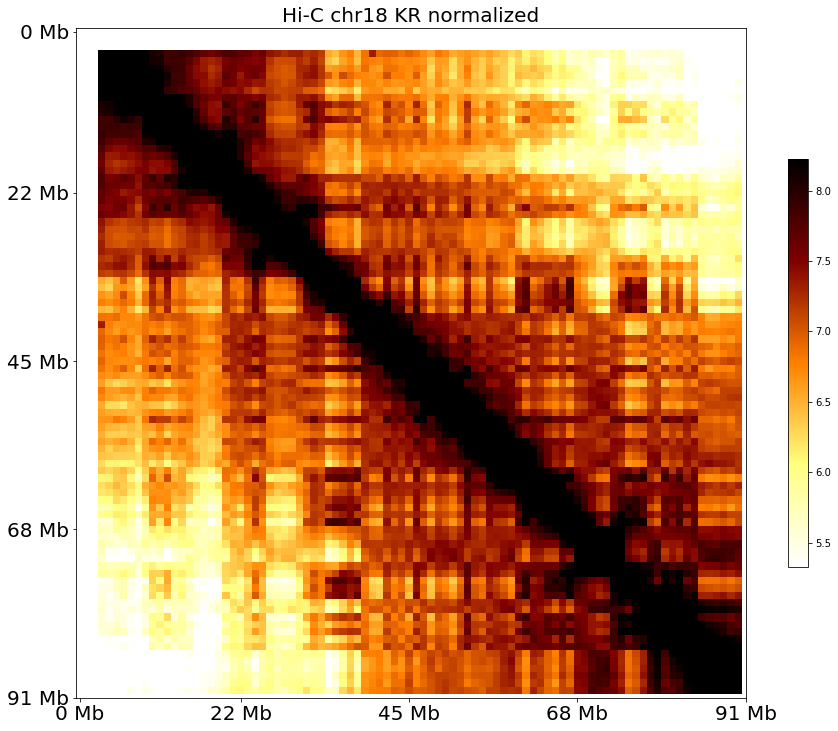

In [34]:
chr12_start, chr12_end, chr18_start, chr18_end = select_chromosomes_coordinates(12, 18, chr_windows_sizes)
hic_selected_locus = gw_hic[chr18_start: chr18_end, chr18_start: chr18_end]

fig, ax, c, _ = plot_heatmap(np.log(hic_selected_locus), vmin = np.log(np.nanpercentile(hic_selected_locus, 3)), vmax = np.log(np.nanpercentile(hic_selected_locus, 90)) ,x_figsize=15, y_figsize=15)

x_ticks = np.linspace(0, hic_selected_locus.shape[1], 5, dtype=int)
x_ticks_labels = [str(i) + " Mb" for i in x_ticks]
y_ticks = np.linspace(0, hic_selected_locus.shape[0], 5, dtype=int)
y_ticks_labels = [str(i) + " Mb" for i in y_ticks]

ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels(x_ticks_labels, fontsize = 20);
ax.set_yticklabels(y_ticks_labels, fontsize = 20);
ax.set_title("Hi-C chr18 KR normalized", fontsize = 20)


del hic_selected_locus

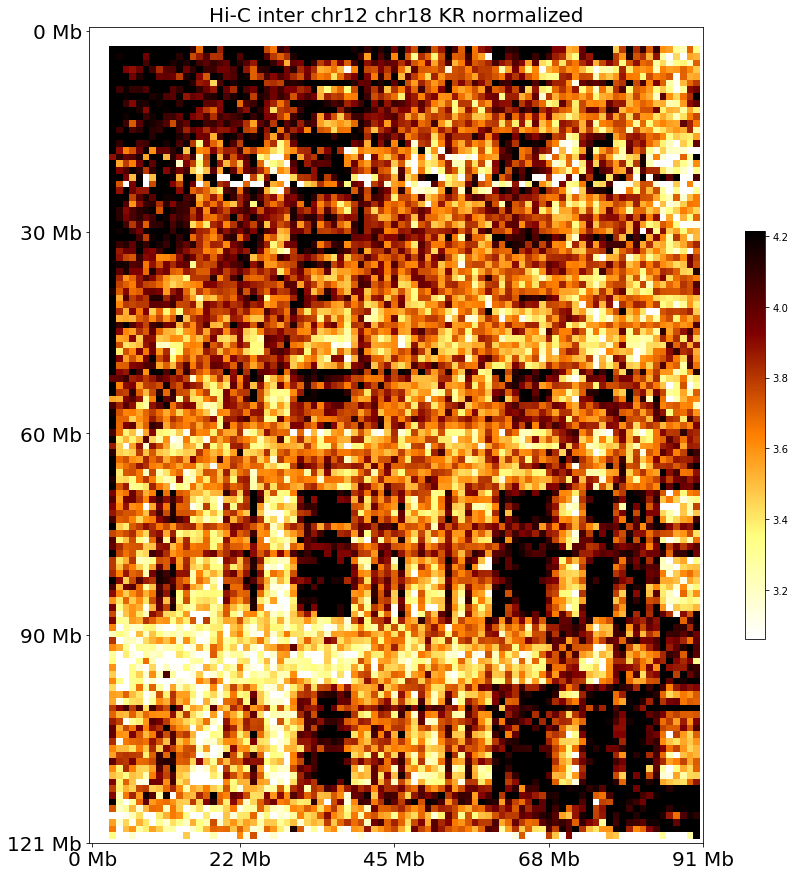

In [35]:
chr12_start, chr12_end, chr18_start, chr18_end = select_chromosomes_coordinates(12, 18, chr_windows_sizes)
hic_selected_locus = gw_hic[chr12_start: chr12_end, chr18_start: chr18_end]

fig, ax, c, _ = plot_heatmap(np.log(hic_selected_locus), vmin = np.log(np.nanpercentile(hic_selected_locus, 3)), vmax = np.log(np.nanpercentile(hic_selected_locus, 90)) ,x_figsize=15, y_figsize=15)

chr12_ticks = np.linspace(0, hic_selected_locus.shape[1], 5, dtype=int)
chr12_tick_labels = [str(i) + " Mb" for i in chr12_ticks]
chr18_ticks = np.linspace(0, hic_selected_locus.shape[0], 5, dtype=int)
chr18_tick_labels = [str(i) + " Mb" for i in chr18_ticks]

ax.set_xticks(chr12_ticks)
ax.set_yticks(chr18_ticks)
ax.set_xticklabels(chr12_tick_labels, fontsize = 20);
ax.set_yticklabels(chr18_tick_labels, fontsize = 20);
ax.set_title("Hi-C inter chr12 chr18 KR normalized", fontsize = 20)


del hic_selected_locus

In [36]:
hic_means = np.zeros((19,19))
for i in range(n_chromosomes):
    for j in range(n_chromosomes):
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]
        start_column = np.sum(chr_windows_sizes[:j])
        stop_column  = start_column + chr_windows_sizes[j]
        chrA = chromosomes[i]
        chrB = chromosomes[j]
        
        hic_means[i, j] = np.nanmean(gw_hic[start_row:stop_row, start_column:stop_column])

<ipython-input-36-c84afb48d528>:11: RuntimeWarning: Mean of empty slice
  hic_means[i, j] = np.nanmean(gw_hic[start_row:stop_row, start_column:stop_column])


## Hi-C - $\pi$ correlation ##

SpearmanrResult(correlation=0.5662805462277509, pvalue=0.0)
(0.5019903408272602, 0.0)
SpearmanrResult(correlation=0.47436266747393774, pvalue=0.0)
(0.5189368528918734, 0.0)
SpearmanrResult(correlation=0.11280725279492299, pvalue=1.5793641217848608e-29)
(0.13228806062091797, 4.614413743794248e-40)


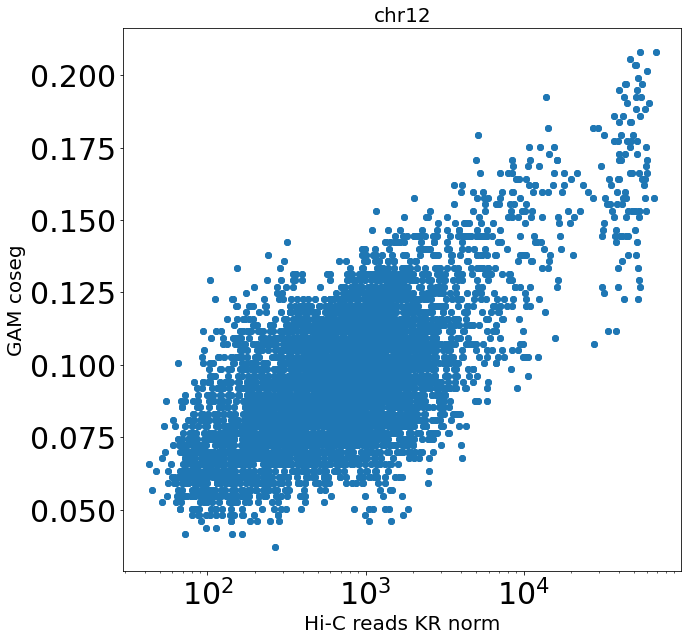

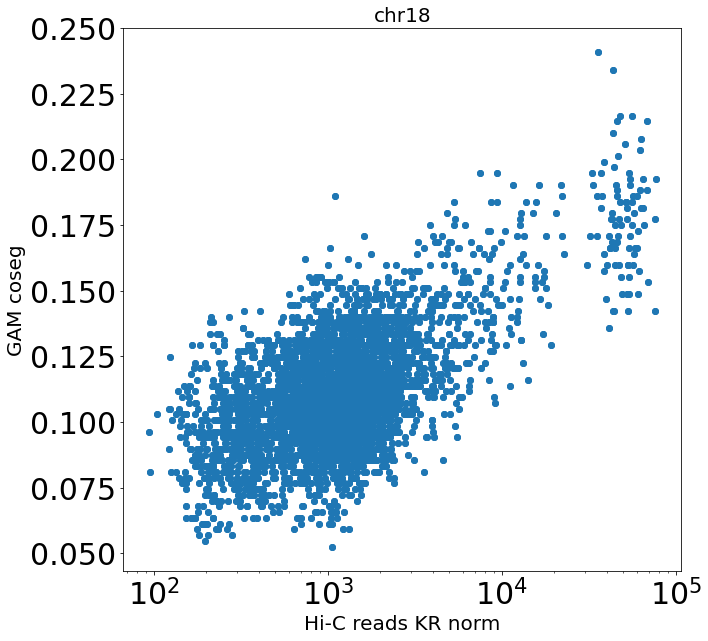

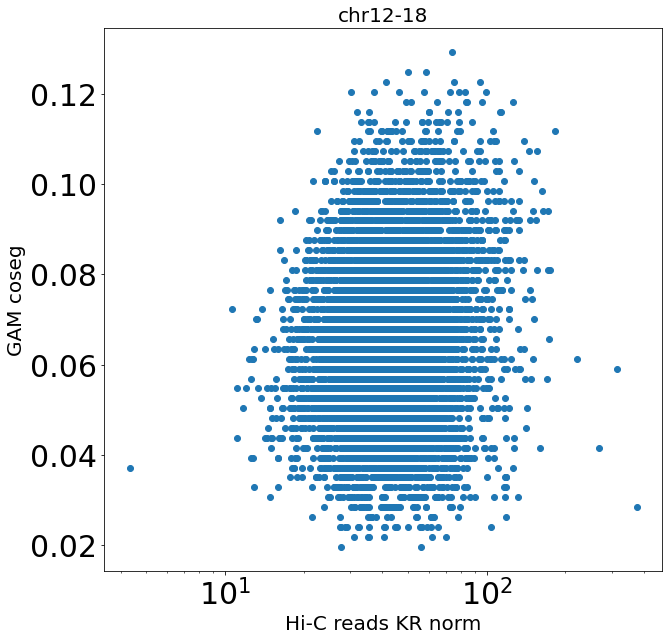

In [37]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]
mat_1 = np.copy(chr12_1NP_1Mb_coseg)
mat_1[mat_1 == 0] = np.nan

ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("GAM coseg", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr18_start: chr18_end, chr18_start: chr18_end]
mat_1 = np.copy(chr18_1NP_1Mb_coseg)
mat_1[mat_1 == 0] = np.nan

ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("GAM coseg", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr18_start: chr18_end]
mat_1 = np.copy(chr12_18_1NP_1Mb_coseg)
mat_1[mat_1 == 0] = np.nan

ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("GAM coseg", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr12-18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1





SpearmanrResult(correlation=0.09643826904702846, pvalue=3.416512868234249e-14)
(0.11440902977068952, 2.1994097681384047e-19)
SpearmanrResult(correlation=0.09274838621419403, pvalue=2.4975685282601638e-08)
(0.13160285084051487, 2.268149479243447e-15)
SpearmanrResult(correlation=0.10139347676063433, pvalue=1.2803406913295805e-18)
(0.12349228113000628, 6.567920611646102e-27)


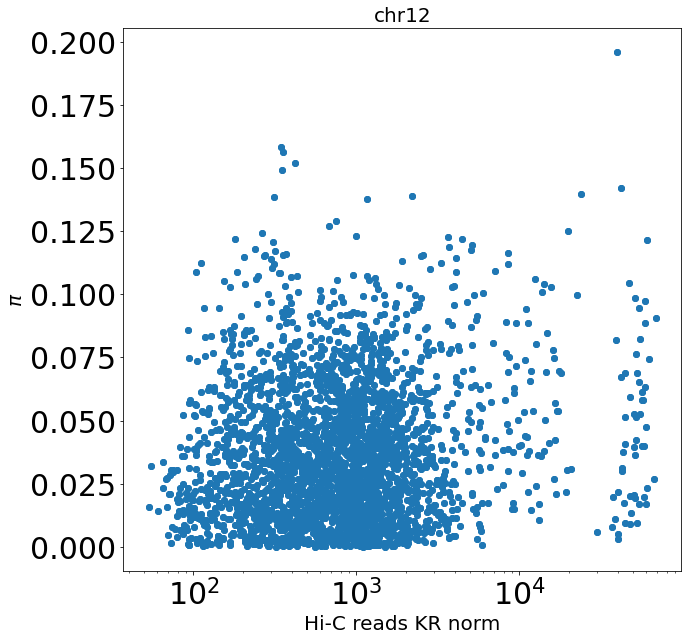

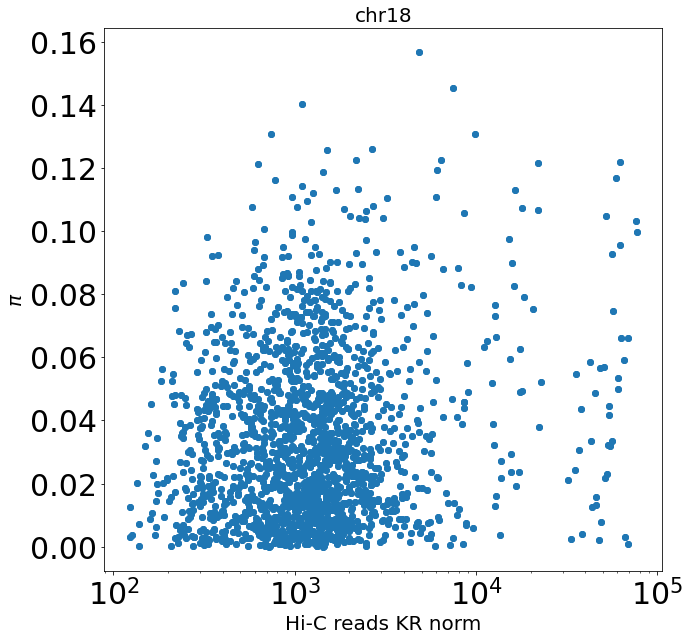

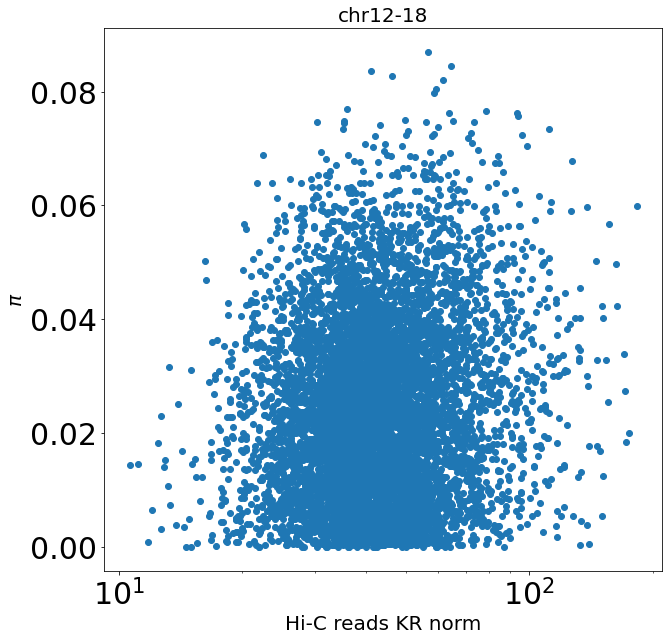

In [38]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]
mat_1 = np.copy(chr12_1NP_1Mb_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr18_start: chr18_end, chr18_start: chr18_end]
mat_1 = np.copy(chr18_1NP_1Mb_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1


fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr18_start: chr18_end]
mat_1 = np.copy(chr12_18_1NP_1Mb_pi_beta_1)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr12-18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1



SpearmanrResult(correlation=0.18113887700228587, pvalue=6.553986196844835e-10)
(0.16057909609351567, 4.61354404309171e-08)
SpearmanrResult(correlation=0.2694999049296753, pvalue=4.8326674792686666e-11)
(0.20508077401254748, 6.901873558443215e-07)
SpearmanrResult(correlation=0.10958919868582054, pvalue=4.0914148677485693e-10)
(0.11438332875628868, 6.76817428370123e-11)


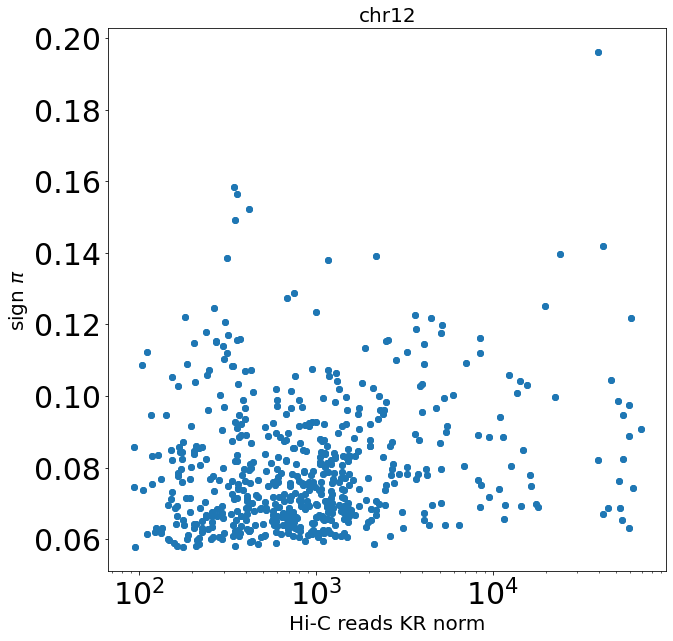

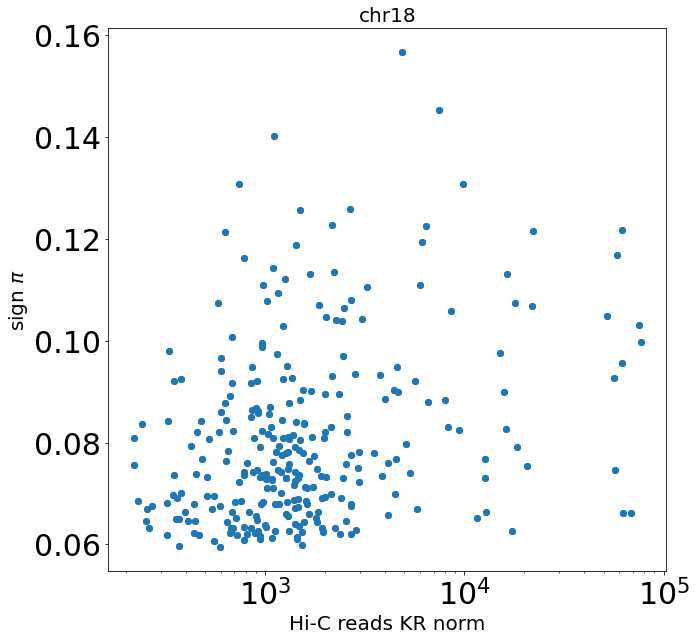

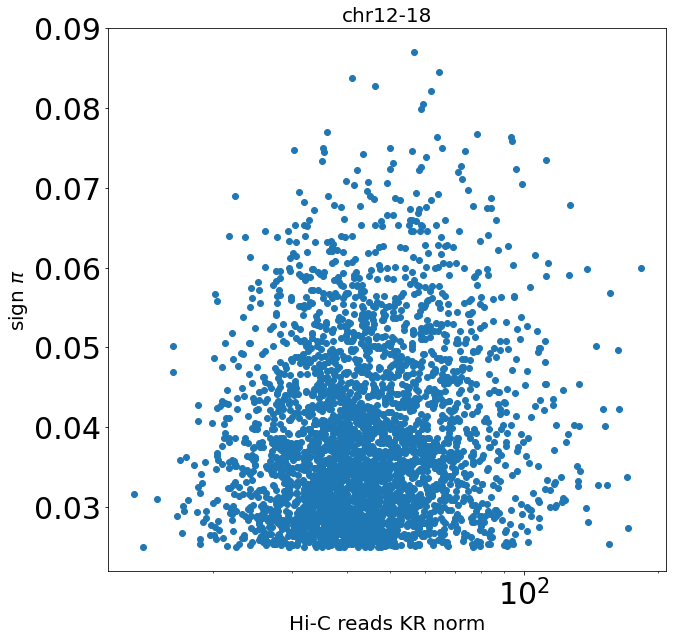

In [39]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr12_start: chr12_end]
mat_1 = np.copy(chr12_1NP_1Mb_sign_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr12", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr18_start: chr18_end, chr18_start: chr18_end]
mat_1 = np.copy(chr18_1NP_1Mb_sign_pi)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);
ax.set_xscale('log')
ax.set_title("chr18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr18_start: chr18_end]
mat_1 = np.copy(chr12_18_1NP_1Mb_sign_pi_beta_1)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr12-18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1



SpearmanrResult(correlation=0.10520108602689805, pvalue=9.213802996124586e-14)
(0.12179829855223831, 5.84403105851576e-18)
SpearmanrResult(correlation=0.11296413390777806, pvalue=0.00011862457864460601)
(0.11205681108914423, 0.0001346253240809346)


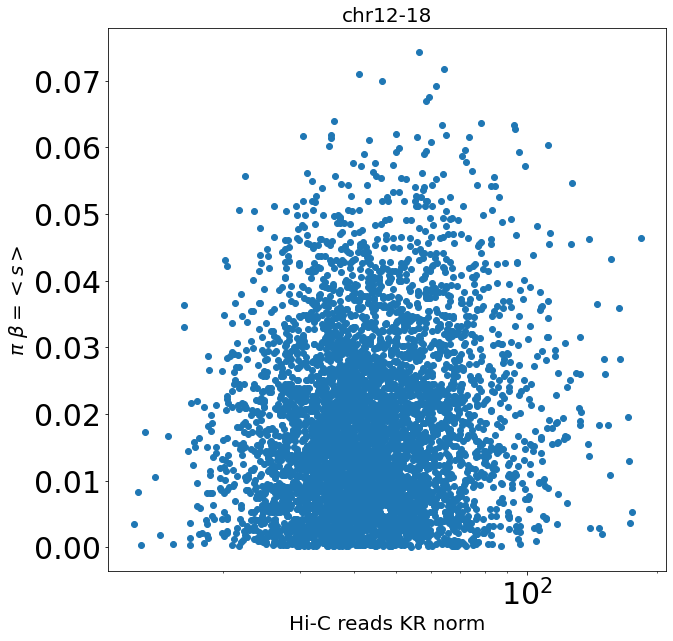

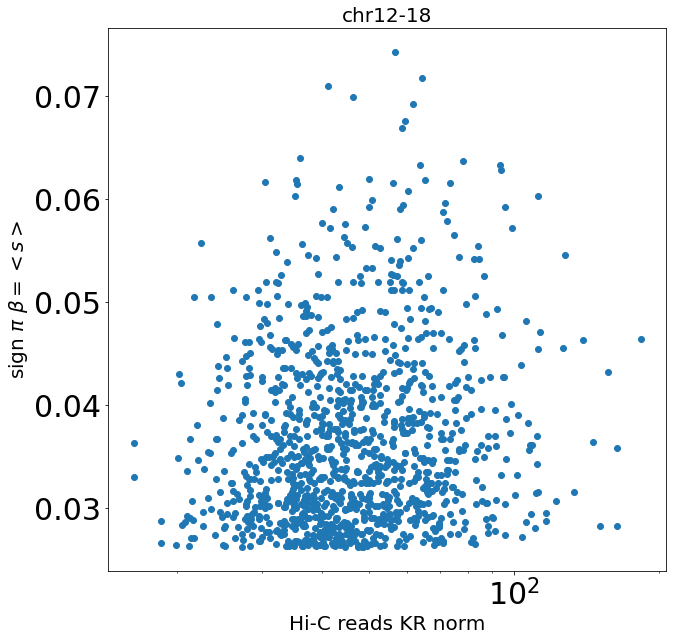

In [40]:
fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr18_start: chr18_end]
mat_1 = np.copy(chr12_18_1NP_1Mb_pi_beta_eval)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("$\pi$ $\\beta = <s>$", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr12-18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

fig, ax = plt.subplots(1, figsize = (10,10))

mat = gw_hic[chr12_start: chr12_end, chr18_start: chr18_end]
mat_1 = np.copy(chr12_18_1NP_1Mb_sign_pi_beta_eval)


ax.scatter(mat, mat_1);
ax.set_xlabel("Hi-C reads KR norm", fontsize = 20);
ax.set_ylabel("sign $\pi$ $\\beta = <s>$", fontsize = 20);

ax.set_xscale('log')
ax.set_title("chr12-18", fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=30)
ax.tick_params(axis='y', which='major', labelsize=30)
print(spearmanr(mat.flatten(), mat_1.flatten(), nan_policy='omit'))

f_mat = mat.flatten()
f_mat_1 = mat_1.flatten()
bad = ~np.logical_or(np.isnan(f_mat), np.isnan(f_mat_1))

f_mat = np.compress(bad, f_mat)  
f_mat_1 = np.compress(bad, f_mat_1)  

print(pearsonr(f_mat, f_mat_1))

del mat, mat_1, fig, ax, f_mat, f_mat_1

